In [2]:
%matplotlib inline

import pandas as p
import numpy as np
df = p.read_csv("proton-decay-inference.csv")
query1 = df.query("label != prediction")
query2 = query1.query('kaon_ke != -1')
import matplotlib.pyplot as plt



(array([  30.,   26.,   23.,   16.,   13.,   21.,   13.,   15.,   17.,
         150.,   13.,   16.,   14.,   23.,   24.,   28.,   45.,   75.,
         135., 9130.]),
 array([8.360000e-04, 5.083600e-02, 1.008360e-01, 1.508360e-01,
        2.008360e-01, 2.508360e-01, 3.008360e-01, 3.508360e-01,
        4.008360e-01, 4.508360e-01, 5.008360e-01, 5.508360e-01,
        6.008360e-01, 6.508360e-01, 7.008360e-01, 7.508360e-01,
        8.008360e-01, 8.508360e-01, 9.008360e-01, 9.508360e-01,
        1.000836e+00]),
 <a list of 20 Patch objects>)

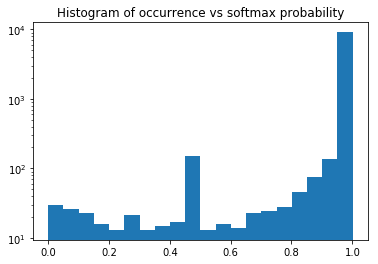

In [3]:
kaon_query = df.query('kaon_ke != -1') #signal
data1 = kaon_query.query('label == prediction') #true positive
data2 = kaon_query.query('label != prediction') #false negative
prob1 = data1['probability']
prob2 = 1 - data2['probability']
data = p.concat([prob1, prob2])
binwidth = 0.05
plt.title('Histogram of occurrence vs softmax probability')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), log=True)

(array([9181.,  233.,  103.,   70.,   47.,   35.,   45.,   33.,   30.,
          21.,   73.,   18.,   11.,   12.,   17.,   12.,   11.,   11.,
          10.,   15.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

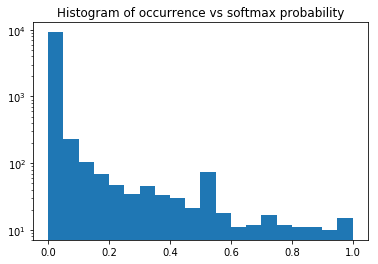

In [55]:
kaon_query = df.query('kaon_ke == -1') #background
data1 = kaon_query.query('label != prediction') #false positive
data2 = kaon_query.query('label == prediction') #true negative
prob1 = data1['probability']
prob2 = 1 - data2['probability']
data = p.concat([prob1, prob2])
binwidth = 0.05
plt.title('Histogram of occurrence vs softmax probability')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), log=True)

10.004 149.994


(array([341., 339., 336., 359., 336., 339., 324., 325., 336., 379., 355.,
        338., 343., 378., 364., 367., 357., 361., 336., 339., 360., 347.,
        381., 350., 345., 378., 357., 357.]),
 array([ 10.004,  15.004,  20.004,  25.004,  30.004,  35.004,  40.004,
         45.004,  50.004,  55.004,  60.004,  65.004,  70.004,  75.004,
         80.004,  85.004,  90.004,  95.004, 100.004, 105.004, 110.004,
        115.004, 120.004, 125.004, 130.004, 135.004, 140.004, 145.004,
        150.004]),
 <a list of 28 Patch objects>)

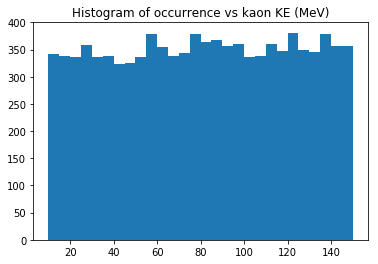

In [4]:
kaon_query = df.query('kaon_ke != -1')
data = (kaon_query['kaon_ke'] - 0.49368)*1000
binwidth = 5
plt.title('Histogram of occurrence vs kaon KE (MeV)')
print(str(min(data)) + " " + str(max(data)))
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

99.8880846548 413.033020322


(array([141., 161., 167., 176., 175., 209., 232., 232., 231., 262., 229.,
        265., 270., 300., 338., 326., 319., 347., 376., 369., 377., 378.,
        402., 364., 414., 410., 435., 431., 429., 462., 457., 143.]),
 array([ 99.88808465, 109.88808465, 119.88808465, 129.88808465,
        139.88808465, 149.88808465, 159.88808465, 169.88808465,
        179.88808465, 189.88808465, 199.88808465, 209.88808465,
        219.88808465, 229.88808465, 239.88808465, 249.88808465,
        259.88808465, 269.88808465, 279.88808465, 289.88808465,
        299.88808465, 309.88808465, 319.88808465, 329.88808465,
        339.88808465, 349.88808465, 359.88808465, 369.88808465,
        379.88808465, 389.88808465, 399.88808465, 409.88808465,
        419.88808465]),
 <a list of 32 Patch objects>)

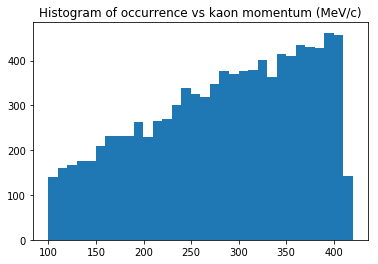

In [5]:
binwidth = 10
data = kaon_query['kaon_ke']
data = ((data**2 - (0.49368)**2)**0.5)*1000
print(str(min(data)) + " " + str(max(data)))
plt.title('Histogram of occurrence vs kaon momentum (MeV/c)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

50.031 200.0


(array([304., 350., 335., 328., 357., 332., 331., 318., 324., 312., 326.,
        347., 347., 301., 333., 330., 315., 344., 341., 326., 361., 350.,
        363., 320., 331., 324., 332., 352., 330., 324.]),
 array([ 50.031,  55.031,  60.031,  65.031,  70.031,  75.031,  80.031,
         85.031,  90.031,  95.031, 100.031, 105.031, 110.031, 115.031,
        120.031, 125.031, 130.031, 135.031, 140.031, 145.031, 150.031,
        155.031, 160.031, 165.031, 170.031, 175.031, 180.031, 185.031,
        190.031, 195.031, 200.031]),
 <a list of 30 Patch objects>)

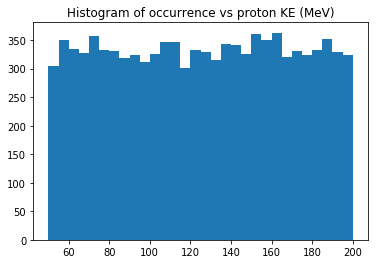

In [6]:
proton_query = df.query('proton_ke != -1')
data = (proton_query['proton_ke'] - 0.93827)*1000
print(str(min(data)) + " " + str(max(data)))
binwidth = 5
plt.title('Histogram of occurrence vs proton KE (MeV)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

310.464609418 644.44394636


(array([194., 209., 243., 235., 224., 242., 262., 277., 235., 276., 250.,
        263., 273., 263., 273., 339., 292., 287., 311., 319., 299., 338.,
        338., 324., 364., 358., 387., 347., 343., 351., 366., 365., 386.,
        155.]), array([310.46460942, 320.46460942, 330.46460942, 340.46460942,
        350.46460942, 360.46460942, 370.46460942, 380.46460942,
        390.46460942, 400.46460942, 410.46460942, 420.46460942,
        430.46460942, 440.46460942, 450.46460942, 460.46460942,
        470.46460942, 480.46460942, 490.46460942, 500.46460942,
        510.46460942, 520.46460942, 530.46460942, 540.46460942,
        550.46460942, 560.46460942, 570.46460942, 580.46460942,
        590.46460942, 600.46460942, 610.46460942, 620.46460942,
        630.46460942, 640.46460942, 650.46460942]), <a list of 34 Patch objects>)

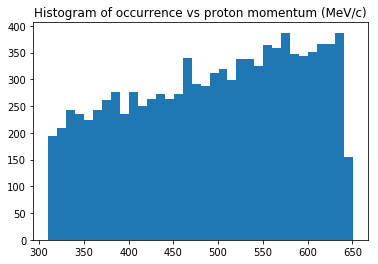

In [7]:
binwidth = 10
data = proton_query['proton_ke']
data = ((data**2 - (0.93827)**2)**0.5)*1000
print(str(min(data)) + " " + str(max(data)))

plt.title('Histogram of occurrence vs proton momentum (MeV/c)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

50.0 249.997


(array([262., 288., 258., 256., 237., 260., 262., 234., 263., 267., 261.,
        232., 241., 255., 236., 244., 224., 218., 251., 260., 255., 233.,
        233., 242., 248., 246., 263., 245., 219., 242., 254., 244., 267.,
        243., 243., 284., 256., 273., 250., 239.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.,
        105., 110., 115., 120., 125., 130., 135., 140., 145., 150., 155.,
        160., 165., 170., 175., 180., 185., 190., 195., 200., 205., 210.,
        215., 220., 225., 230., 235., 240., 245., 250.]),
 <a list of 40 Patch objects>)

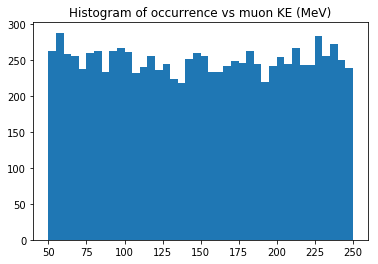

In [8]:
muon_query = df.query('muon_ke != -1')
data = (muon_query['muon_ke'] - 0.10566)*1000
print(str(min(data)) + " " + str(max(data)))

binwidth = 5
plt.title('Histogram of occurrence vs muon KE (MeV)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

114.306605233 339.59956721


(array([418., 398., 390., 420., 420., 449., 437., 418., 430., 416., 403.,
        486., 438., 437., 462., 460., 447., 460., 486., 457., 522., 492.,
        242.]), array([114.30660523, 124.30660523, 134.30660523, 144.30660523,
        154.30660523, 164.30660523, 174.30660523, 184.30660523,
        194.30660523, 204.30660523, 214.30660523, 224.30660523,
        234.30660523, 244.30660523, 254.30660523, 264.30660523,
        274.30660523, 284.30660523, 294.30660523, 304.30660523,
        314.30660523, 324.30660523, 334.30660523, 344.30660523]), <a list of 23 Patch objects>)

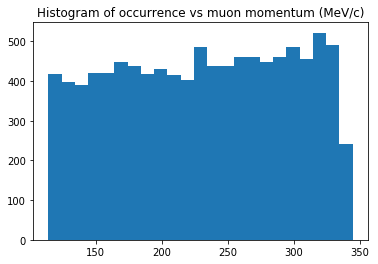

In [9]:
binwidth = 10
data = muon_query['muon_ke']
data = ((data**2 - (0.10566)**2)**0.5)*1000
print(str(min(data)) + " " + str(max(data)))

plt.title('Histogram of occurrence vs muon momentum (MeV/c)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

In [10]:
print('Number of images: ' + str(df.index.size))
print(df.to_string())

Number of images: 19815
       entry  run  subrun  event  label  prediction  probability   kaon_ke  proton_ke   muon_ke
0          0    1      55   5454      0           0     1.000000  0.634561  -1.000000 -1.000000
1          1    1       6    598      0           0     1.000000  0.505621  -1.000000 -1.000000
2          2    1      10    941      1           1     1.000000 -1.000000   1.117070  0.322950
3          3    1      85   8470      0           0     0.992416  0.546126  -1.000000 -1.000000
4          4    1      90   8985      1           1     0.984798 -1.000000   0.989343  0.162867
5          5    1      44   4379      0           0     1.000000  0.539681  -1.000000 -1.000000
6          6    1      56   5515      1           1     0.999953 -1.000000   1.004500  0.345315
7          7    1      36   3585      1           1     0.984239 -1.000000   1.005850  0.257971
8          8    1      27   2652      0           0     1.000000  0.562873  -1.000000 -1.000000
9          9    

In [11]:
print('Number of misclassifications: ' + str(query1.index.size))
print(query1.to_string())

Number of misclassifications: 381
       entry  run  subrun  event  label  prediction  probability   kaon_ke  proton_ke   muon_ke
107      107    1      97   9675      1           0     0.548192 -1.000000   1.062060  0.248323
161      161    1      53   5281      1           0     0.803972 -1.000000   1.081390  0.240665
183      183    1      11   1095      1           0     0.864383 -1.000000   1.014970  0.242904
530      530    1      35   3438      1           0     0.500000 -1.000000   1.047800  0.320290
531      531    1      19   1868      0           1     0.798694  0.568607  -1.000000 -1.000000
559      559    1      10    994      0           1     0.711630  0.615642  -1.000000 -1.000000
585      585    1      79   7822      0           1     0.816420  0.615509  -1.000000 -1.000000
589      589    1       8    772      0           1     0.937881  0.616134  -1.000000 -1.000000
605      605    1       7    630      0           1     0.867882  0.595497  -1.000000 -1.000000
682   

(array([62.,  5.,  8.,  8.,  7.,  9.,  7.,  5.,  8.,  6.,  4.,  4.,  5.,
         7.,  6.,  5.,  3.,  4.,  7.,  6.,  7.,  7., 10.,  5., 10.,  3.,
         4.,  8.,  1.,  8.,  4.,  9.,  5.,  3.,  7.,  7.,  9.,  7.,  6.,
         4.,  9.,  4.,  9.,  7.,  8.,  9.,  8.,  6.,  6., 15.]),
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
        0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
        0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ]),
 <a list of 50 Patch objects>)

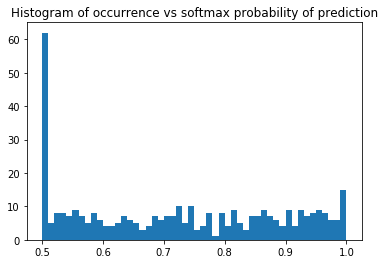

In [12]:
# misclassification
data = query1['probability']
binwidth = 0.01
plt.title('Histogram of occurrence vs softmax probability of prediction')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

In [13]:
random = query1.query('probability > 0.95')
print('Number of random misclassifications: ' + str(random.index.size))
print(random.to_string())
print(random['entry'].values)

Number of random misclassifications: 44
       entry  run  subrun  event  label  prediction  probability   kaon_ke  proton_ke   muon_ke
1585    1585    1      89   8868      1           0     0.997979 -1.000000   1.004390  0.271457
1721    1721    1      49   4898      1           0     0.953351 -1.000000   1.067280  0.275653
1991    1991    1     100   9908      0           1     0.981871  0.610600  -1.000000 -1.000000
2409    2409    1      41   4019      0           1     0.996616  0.597716  -1.000000 -1.000000
2436    2436    1      38   3757      0           1     0.958776  0.546474  -1.000000 -1.000000
2630    2630    1       1     42      0           1     0.978790  0.536250  -1.000000 -1.000000
3413    3413    1      58   5737      1           0     0.997219 -1.000000   1.017360  0.240203
3713    3713    1      37   3675      0           1     0.998229  0.595265  -1.000000 -1.000000
4025    4025    1       2    101      1           0     0.985987 -1.000000   0.998755  0.260417


Welcome to JupyROOT 6.08/06
('Entry', 1585, 'Particle PDG code', -13)
('Entry', 1585, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


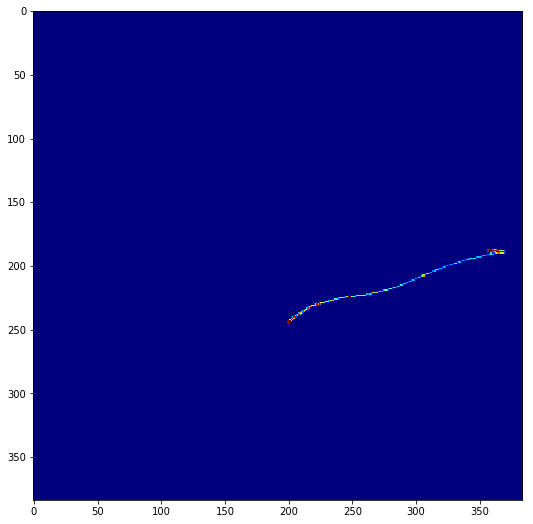

('Entry', 1721, 'Particle PDG code', 2212)
('Entry', 1721, 'Particle PDG code', -13)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


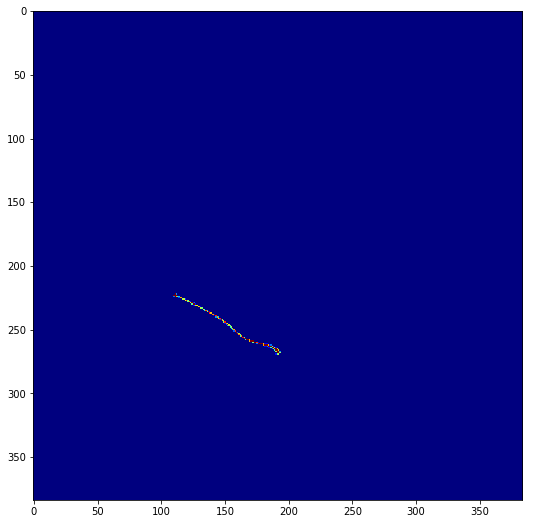

('Entry', 1991, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


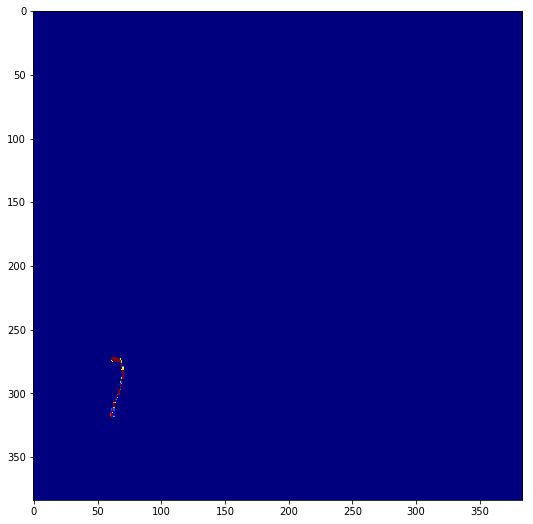

('Entry', 2409, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


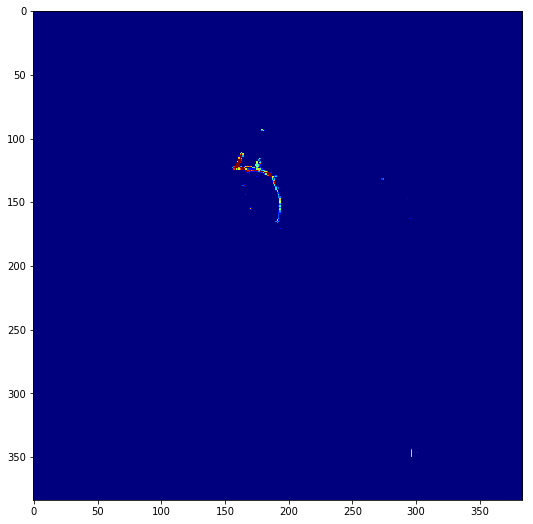

('Entry', 2436, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


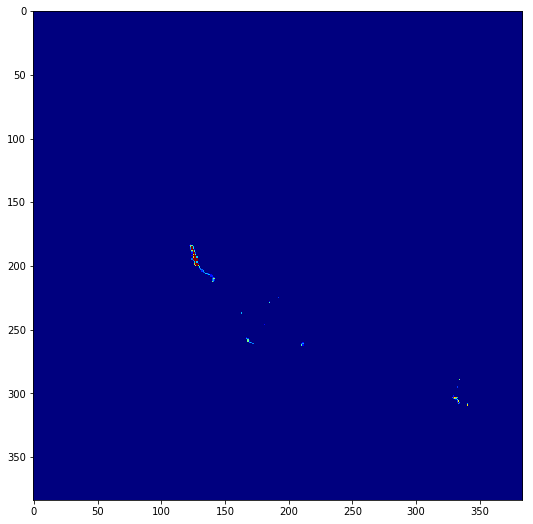

('Entry', 2630, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


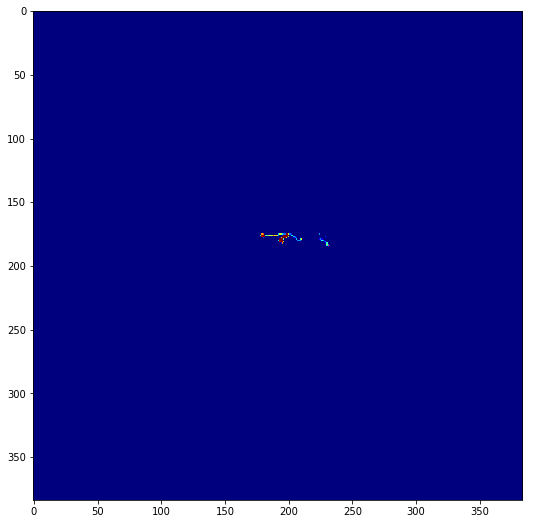

('Entry', 3413, 'Particle PDG code', 2212)
('Entry', 3413, 'Particle PDG code', -13)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


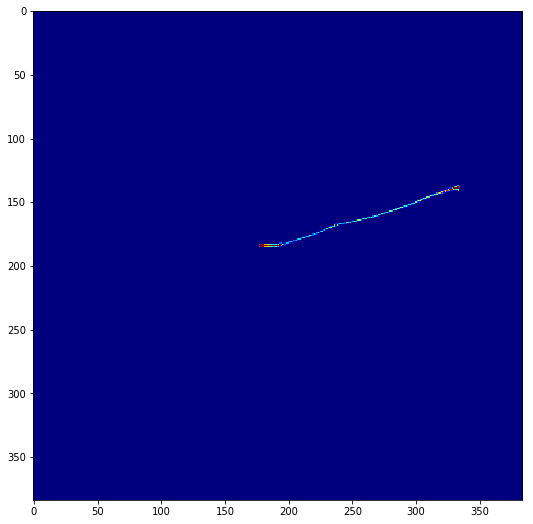

('Entry', 3713, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


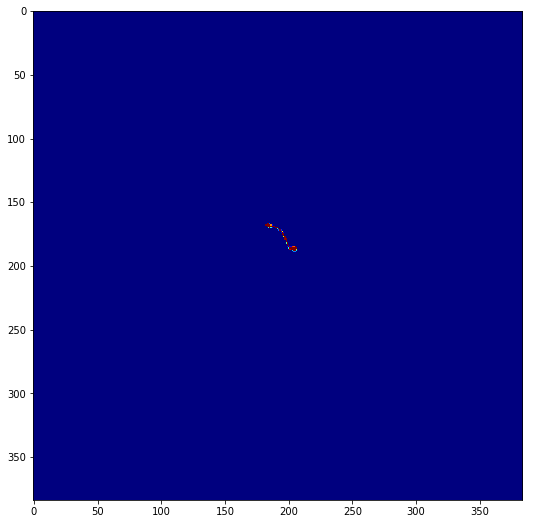

('Entry', 4025, 'Particle PDG code', -13)
('Entry', 4025, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


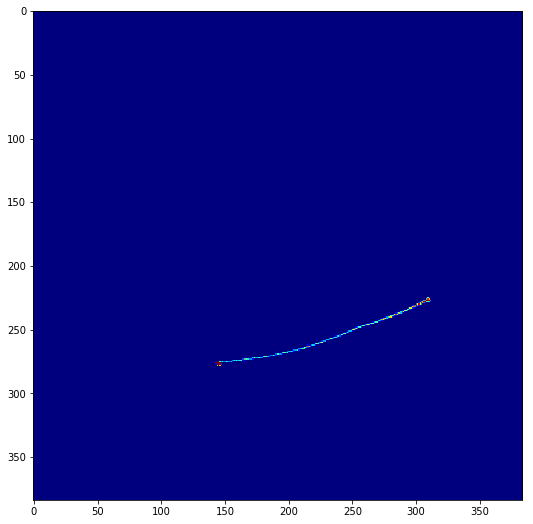

('Entry', 4967, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


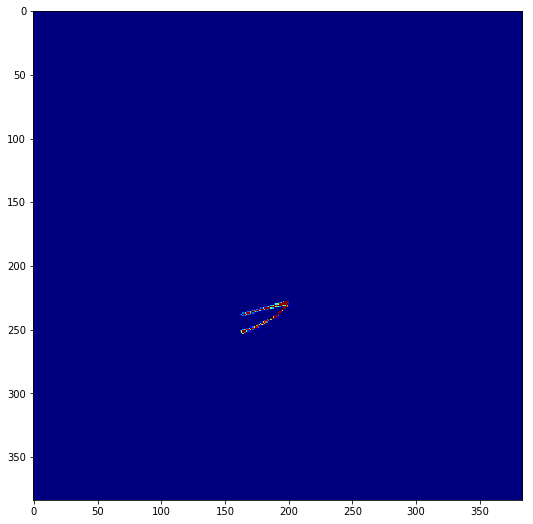

('Entry', 5042, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


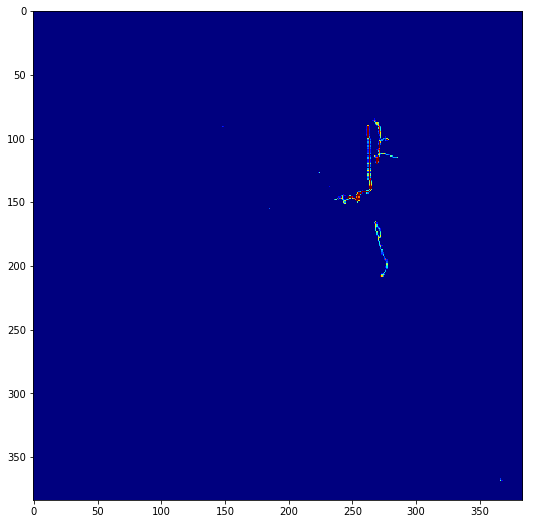

('Entry', 5846, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


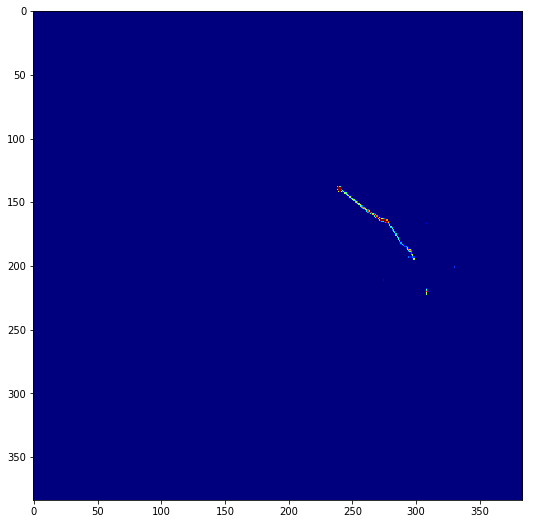

('Entry', 6090, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


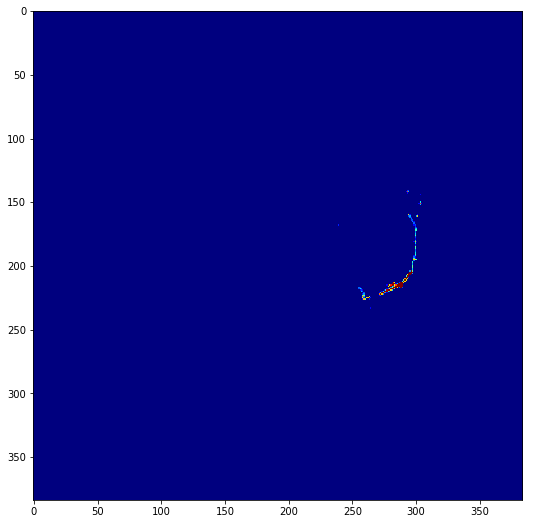

('Entry', 6849, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


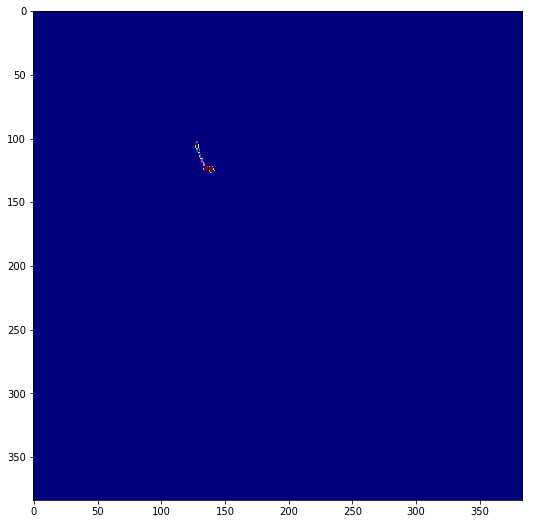

('Entry', 7349, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


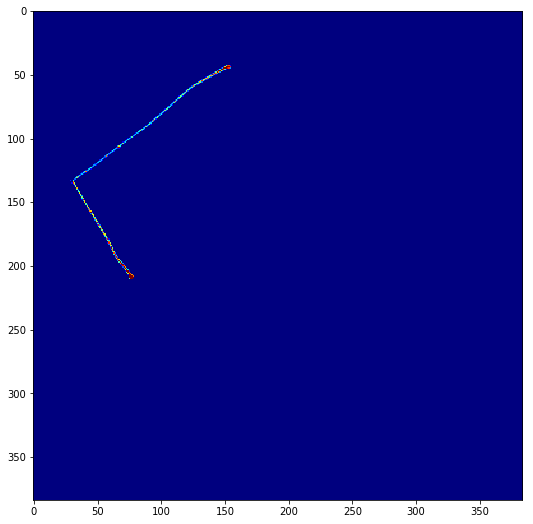

('Entry', 7729, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


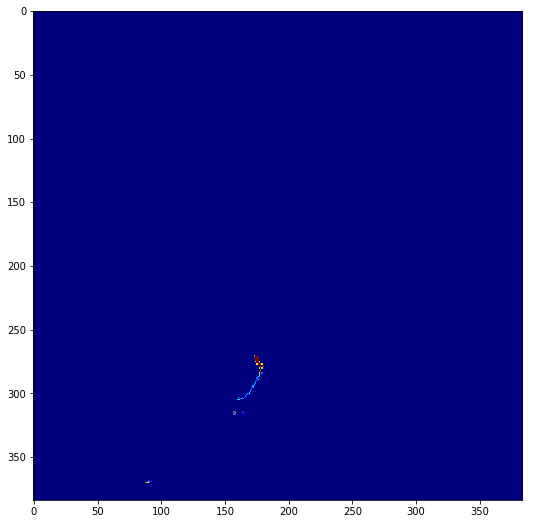

('Entry', 7957, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


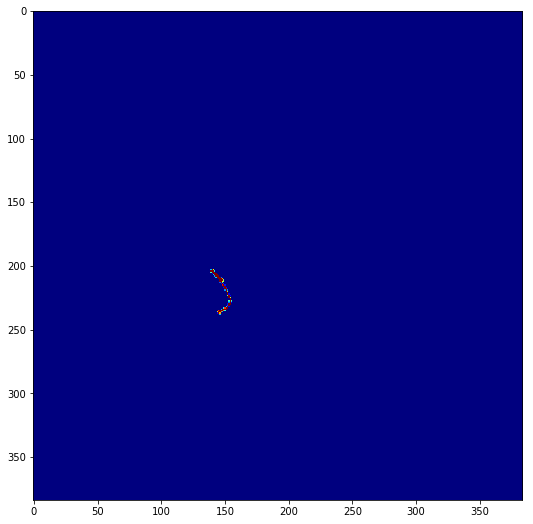

('Entry', 8446, 'Particle PDG code', 2212)
('Entry', 8446, 'Particle PDG code', -13)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


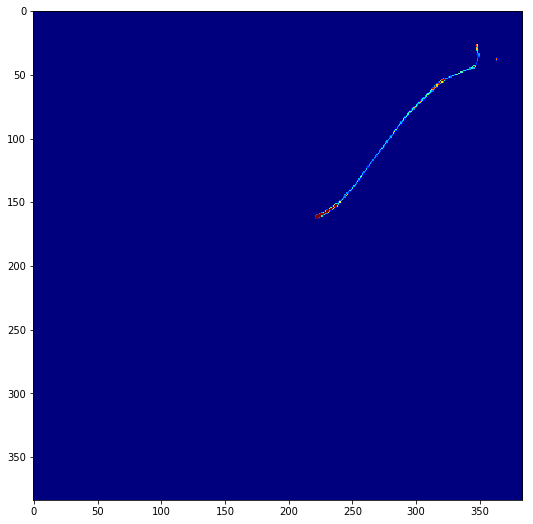

('Entry', 9360, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


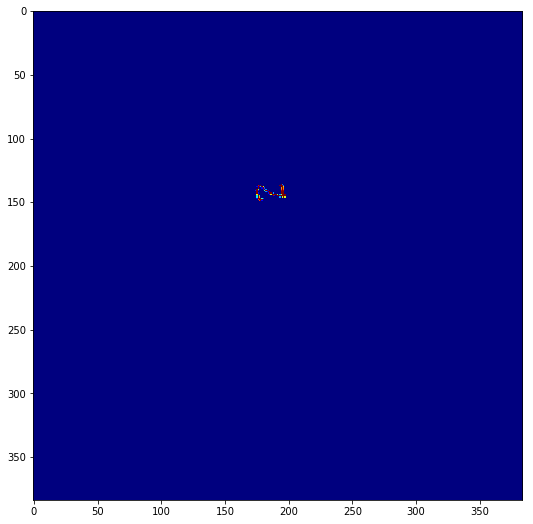

('Entry', 9474, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


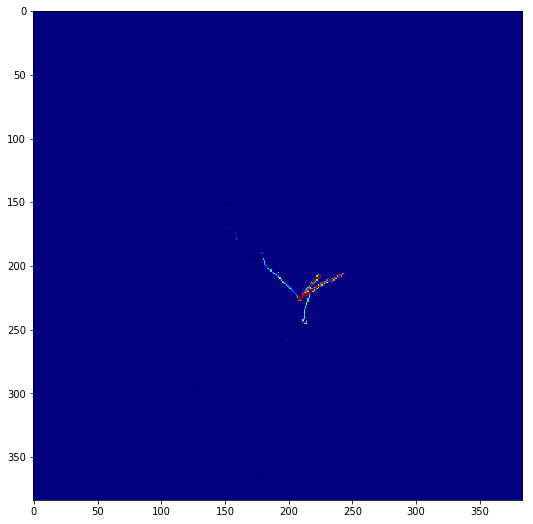

('Entry', 9701, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


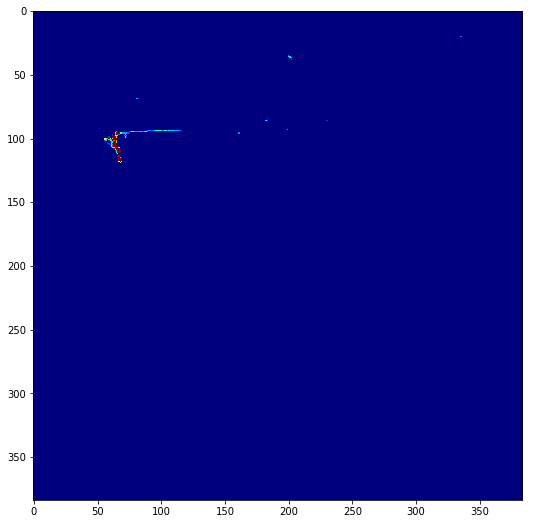

('Entry', 10149, 'Particle PDG code', -13)
('Entry', 10149, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


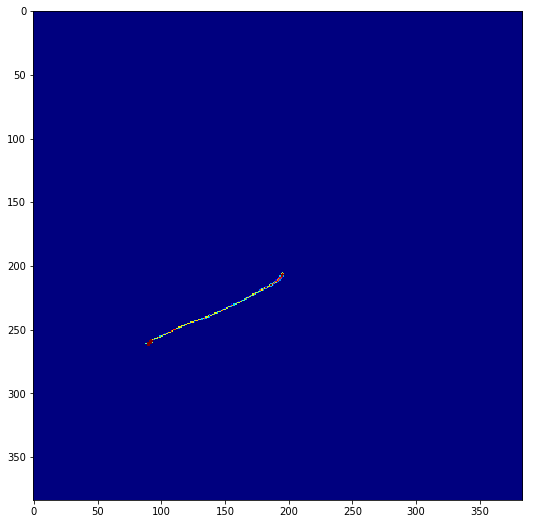

('Entry', 10496, 'Particle PDG code', -13)
('Entry', 10496, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


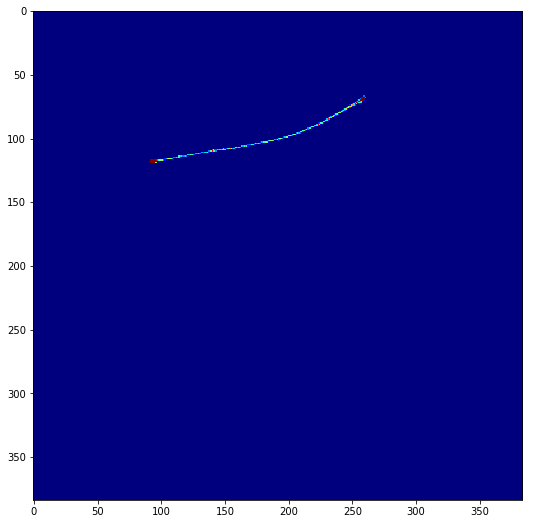

('Entry', 10605, 'Particle PDG code', -13)
('Entry', 10605, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


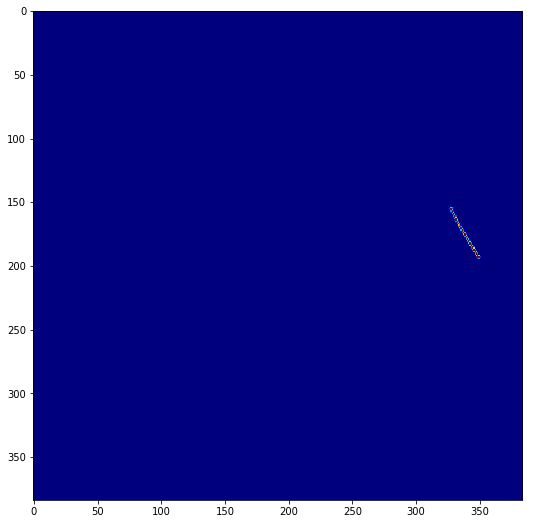

('Entry', 11116, 'Particle PDG code', -13)
('Entry', 11116, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


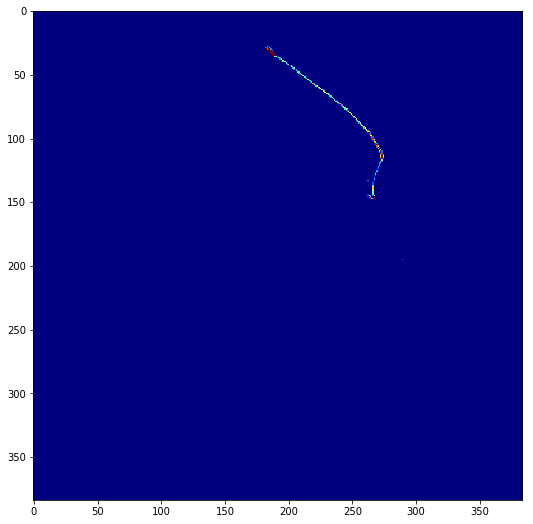

('Entry', 11319, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


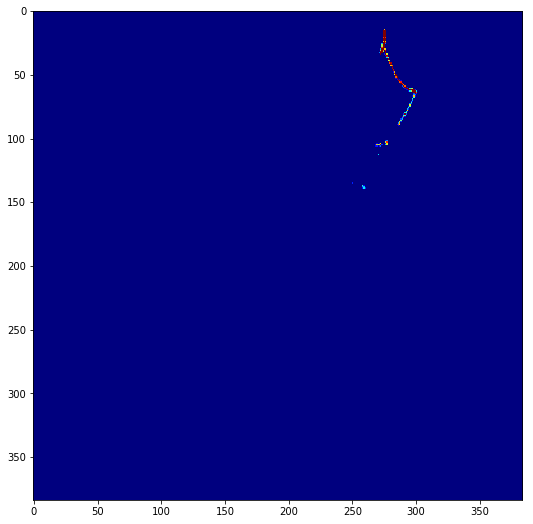

('Entry', 11411, 'Particle PDG code', -13)
('Entry', 11411, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


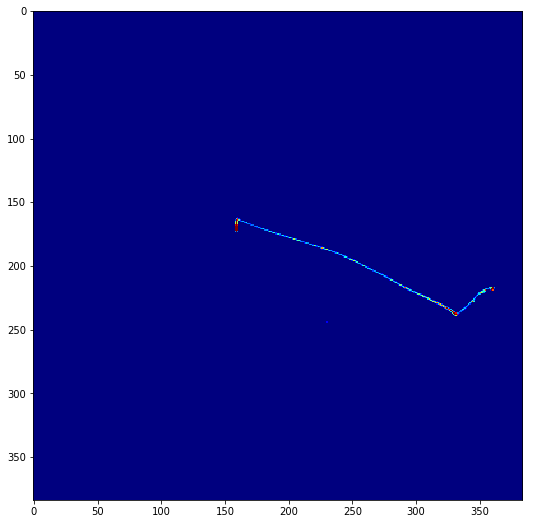

('Entry', 12618, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


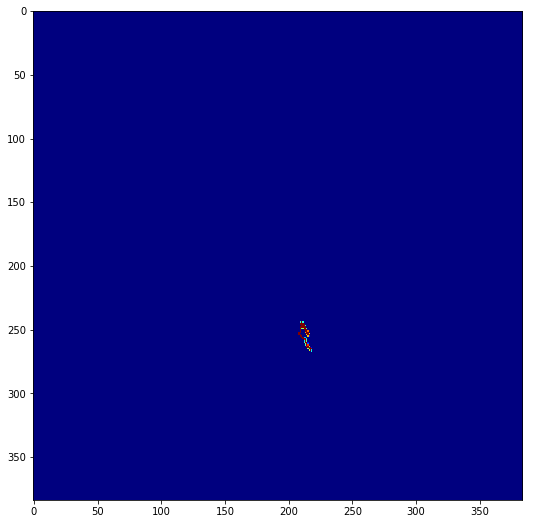

('Entry', 12742, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


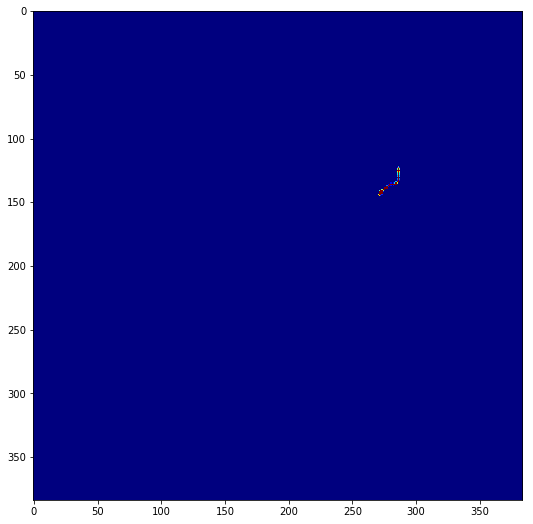

('Entry', 12747, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


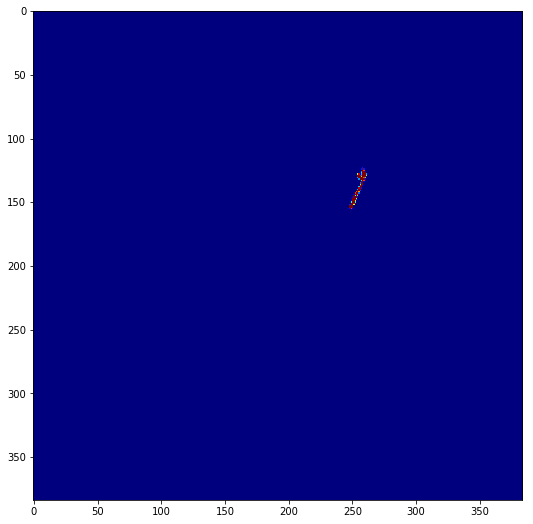

('Entry', 12762, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


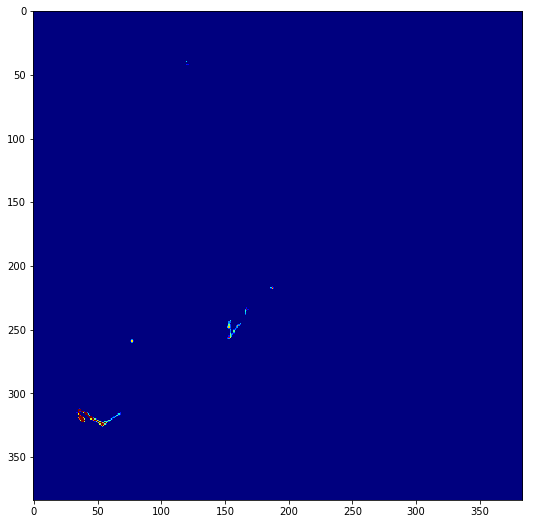

('Entry', 13010, 'Particle PDG code', -13)
('Entry', 13010, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


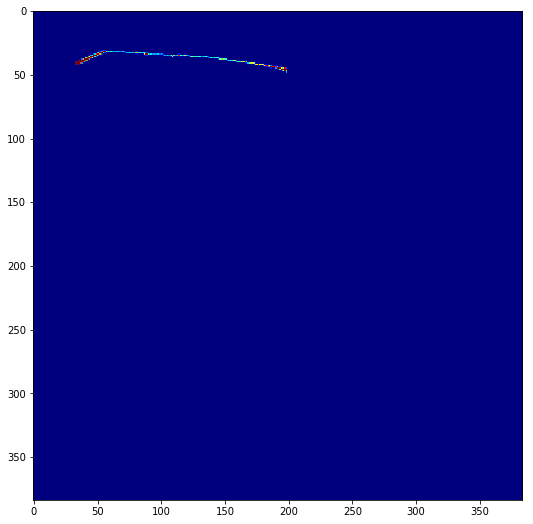

('Entry', 13105, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


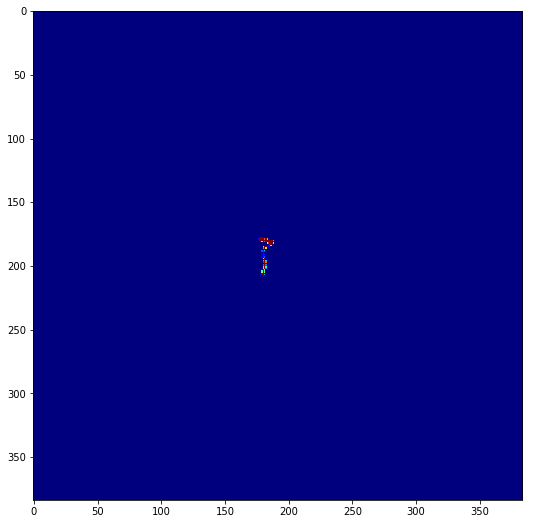

('Entry', 13127, 'Particle PDG code', -13)
('Entry', 13127, 'Particle PDG code', 2212)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


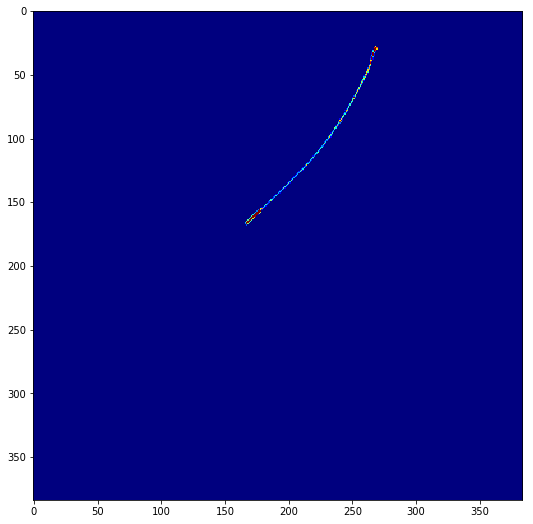

('Entry', 13238, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


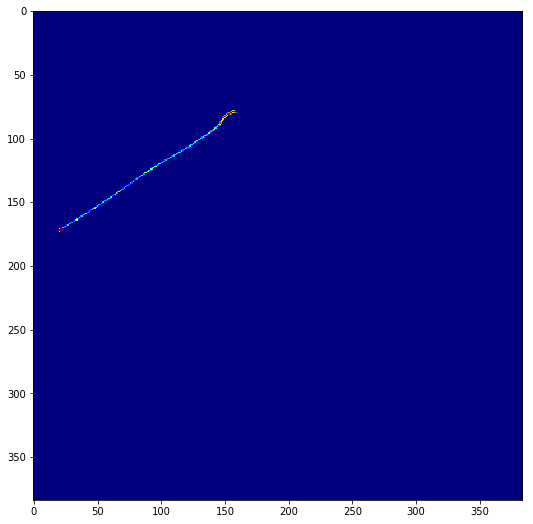

('Entry', 13509, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


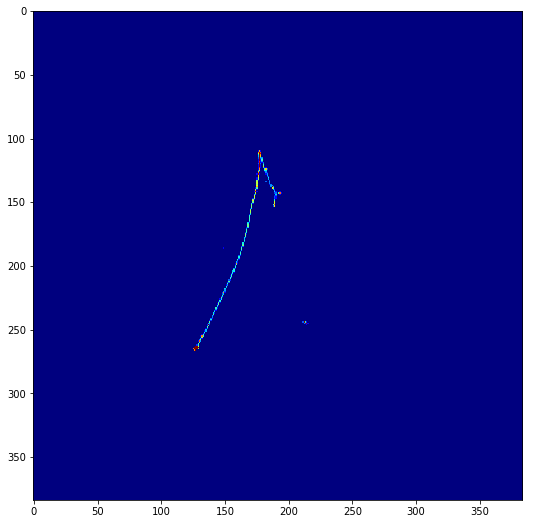

('Entry', 15657, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


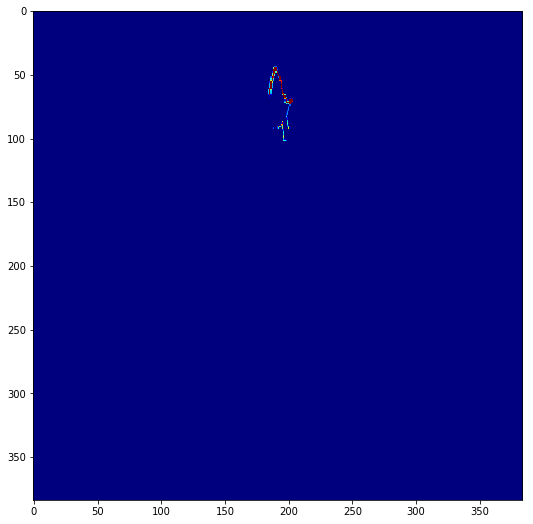

('Entry', 15688, 'Particle PDG code', 2212)
('Entry', 15688, 'Particle PDG code', -13)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


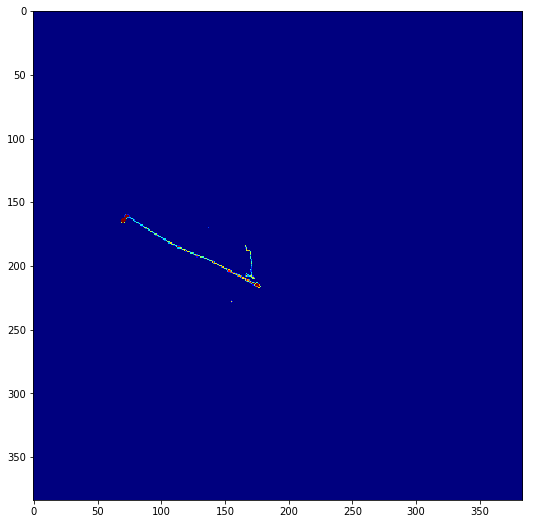

('Entry', 15708, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


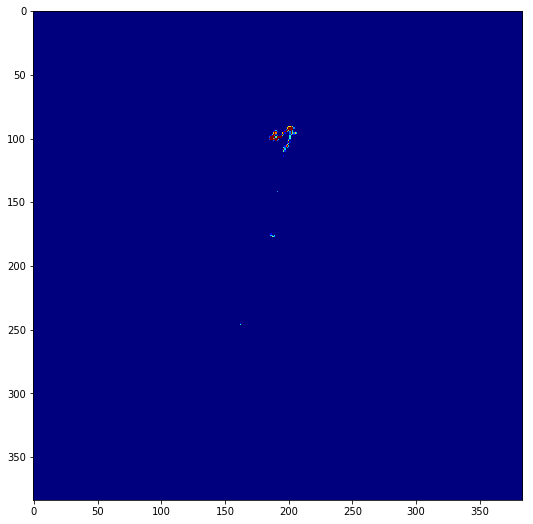

('Entry', 15994, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


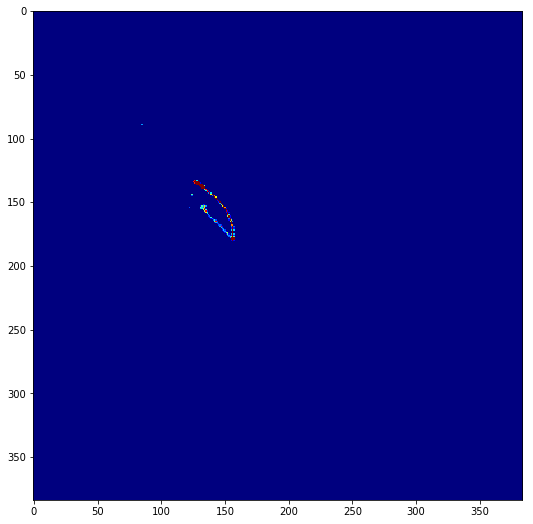

('Entry', 16990, 'Particle PDG code', 2212)
('Entry', 16990, 'Particle PDG code', -13)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


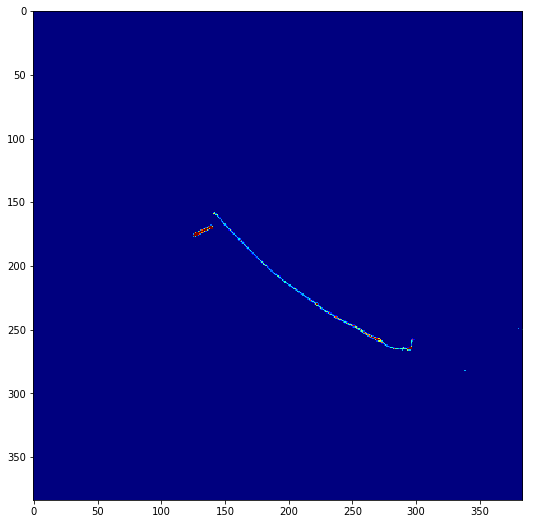

('Entry', 17878, 'Particle PDG code', 2212)
('Entry', 17878, 'Particle PDG code', -13)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


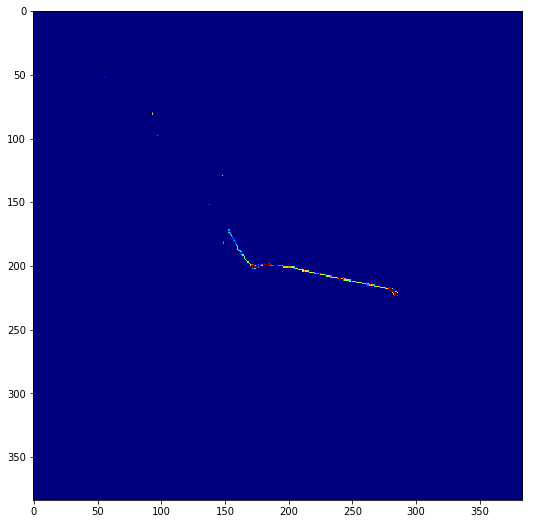

('Entry', 19593, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


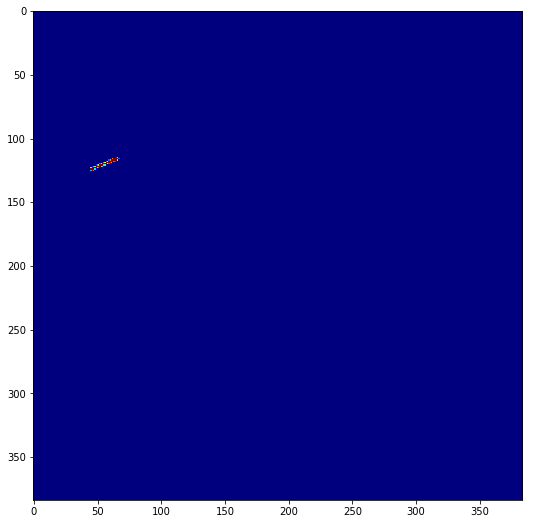

('Entry', 19712, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)


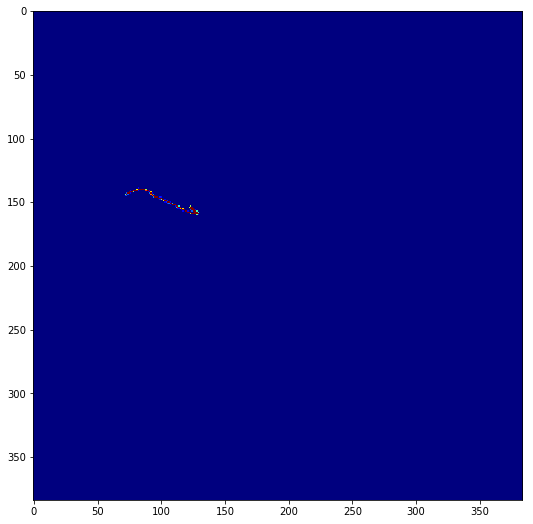

In [14]:
import ROOT
from larcv import larcv

REPOSITORY_DIR='../../'
_files = [REPOSITORY_DIR + f for f in ['mix.root']]
image_chain = ROOT.TChain("image2d_data_tree")
particle_chain = ROOT.TChain("particle_mctruth_tree")

for _file in _files: image_chain.AddFile(_file)
for _file in _files: particle_chain.AddFile(_file)
entries = random['entry'].values

for entry in entries:
    image_chain.GetEntry(entry)
    particle_chain.GetEntry(entry)
    entry_data = particle_chain.particle_mctruth_branch
    for particle in entry_data.as_vector(): print('Entry',entry,'Particle PDG code',particle.pdg_code())
    image2d_array = image_chain.image2d_data_branch.as_vector()

    for index, image in enumerate(image2d_array[0:1]):
        image_numpy = larcv.as_ndarray(image)
        print("Image index", index)
        print("image_numpy has type {}".format(type(image_numpy)))
        print("Image dimensions are {}".format(image_numpy.shape))
        
        
        fig = plt.figure(figsize=(9,9))
        plt.imshow(image_numpy, interpolation='none',cmap='jet', vmin = 0, vmax = 100)
        plt.show()

In [15]:
print('Number of kaons classified as proton + muon: ' + str(query2.index.size))
print(query2.to_string())

Number of kaons classified as proton + muon: 191
       entry  run  subrun  event  label  prediction  probability   kaon_ke  proton_ke  muon_ke
531      531    1      19   1868      0           1     0.798694  0.568607       -1.0     -1.0
559      559    1      10    994      0           1     0.711630  0.615642       -1.0     -1.0
585      585    1      79   7822      0           1     0.816420  0.615509       -1.0     -1.0
589      589    1       8    772      0           1     0.937881  0.616134       -1.0     -1.0
605      605    1       7    630      0           1     0.867882  0.595497       -1.0     -1.0
714      714    1      35   3468      0           1     0.741563  0.528668       -1.0     -1.0
755      755    1       3    222      0           1     0.943948  0.642857       -1.0     -1.0
758      758    1      31   3037      0           1     0.513474  0.587990       -1.0     -1.0
851      851    1      88   8732      0           1     0.734416  0.585709       -1.0     -1.0
1

In [16]:
badly_classified = query2.query('probability > 0.9')
print('Number of kaons classified as proton + muon with greater than 0.9 softmax probability: ' + str(badly_classified.index.size))
print(badly_classified.to_string())
print(badly_classified['entry'].values)

Number of kaons classified as proton + muon with greater than 0.9 softmax probability: 56
       entry  run  subrun  event  label  prediction  probability   kaon_ke  proton_ke  muon_ke
589      589    1       8    772      0           1     0.937881  0.616134       -1.0     -1.0
755      755    1       3    222      0           1     0.943948  0.642857       -1.0     -1.0
1313    1313    1      48   4776      0           1     0.926287  0.642763       -1.0     -1.0
1688    1688    1      46   4540      0           1     0.928175  0.524093       -1.0     -1.0
1991    1991    1     100   9908      0           1     0.981871  0.610600       -1.0     -1.0
2409    2409    1      41   4019      0           1     0.996616  0.597716       -1.0     -1.0
2436    2436    1      38   3757      0           1     0.958776  0.546474       -1.0     -1.0
2552    2552    1     100   9989      0           1     0.922424  0.570607       -1.0     -1.0
2630    2630    1       1     42      0           1    

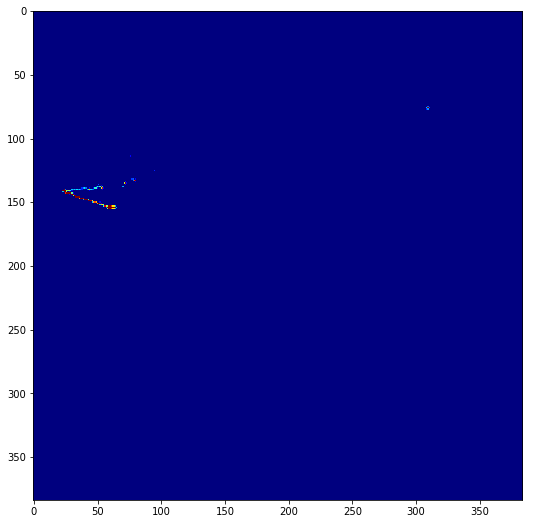

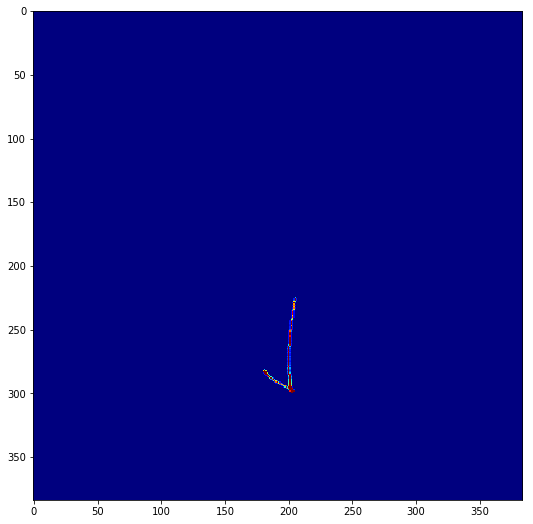

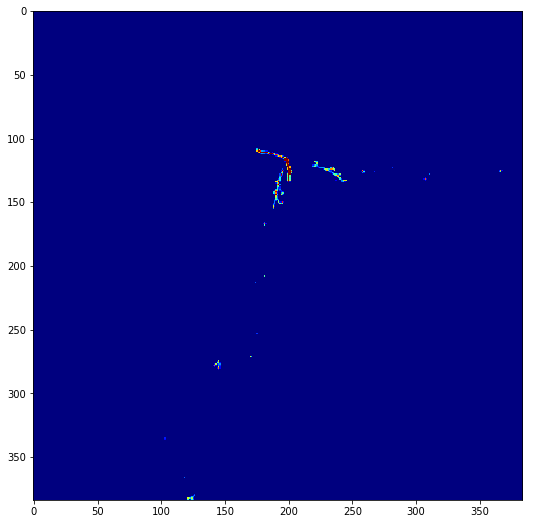

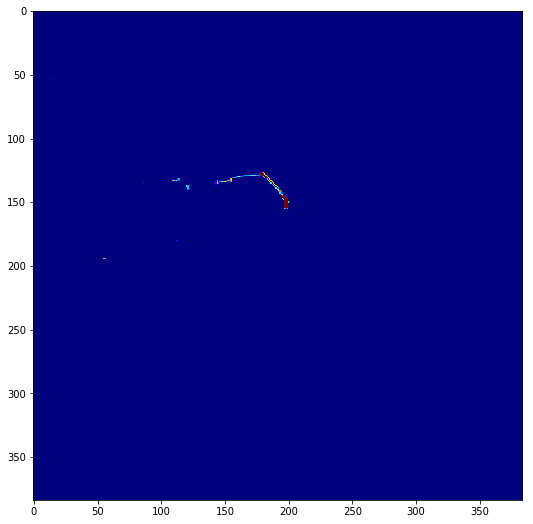

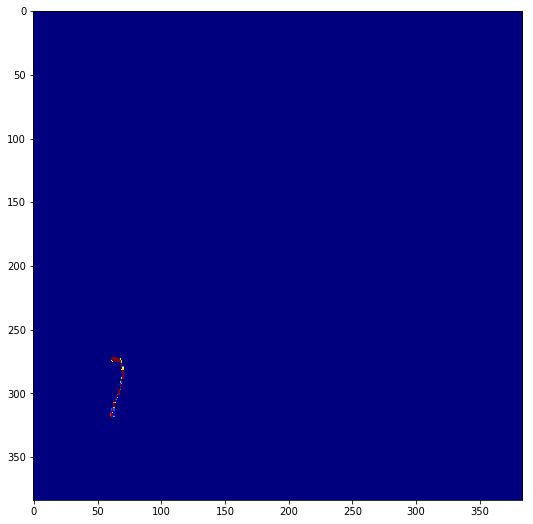

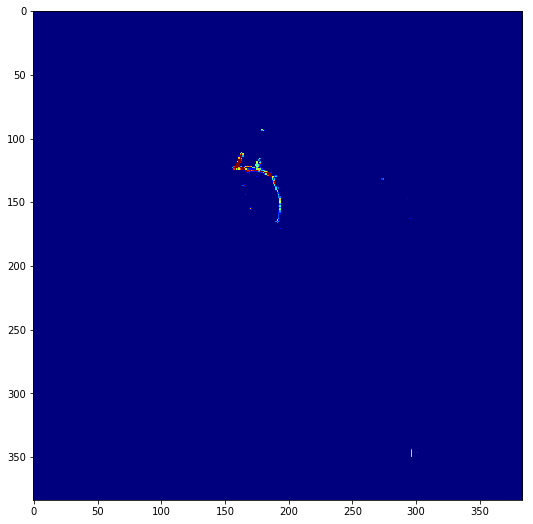

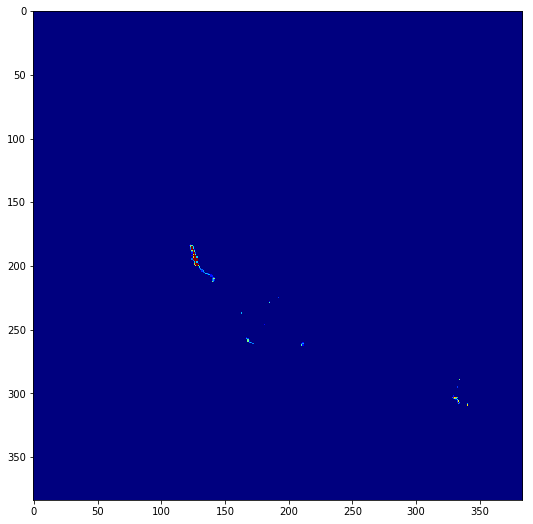

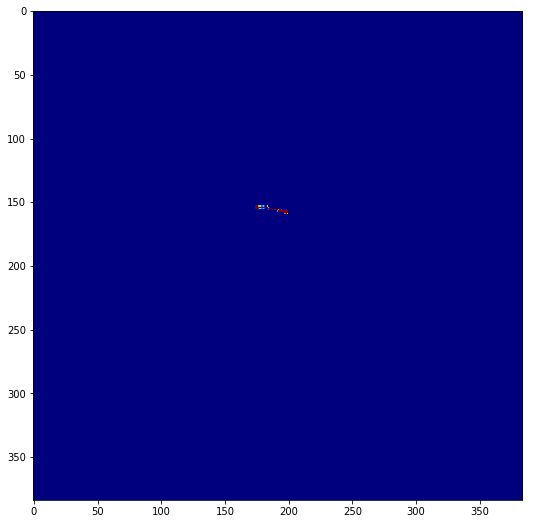

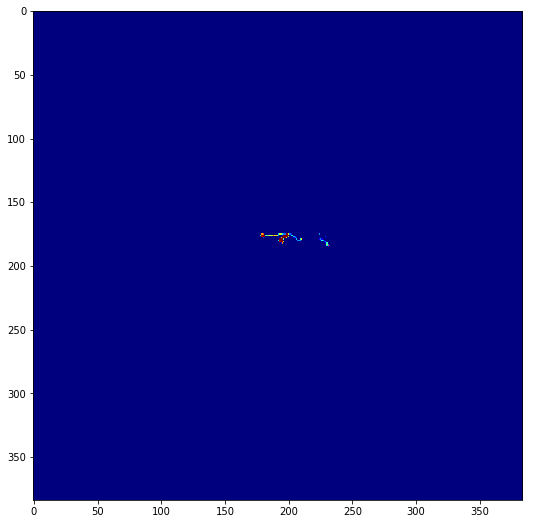

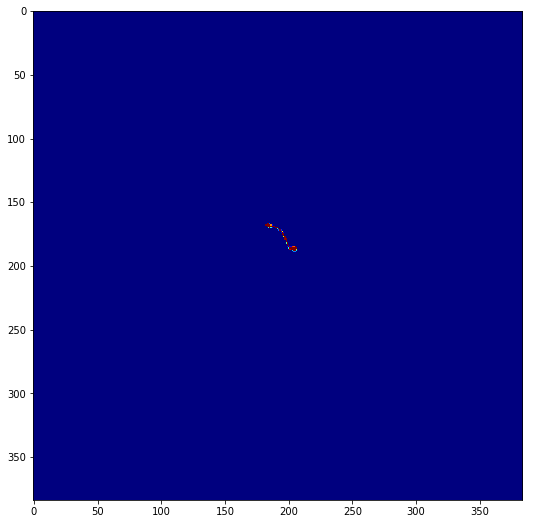

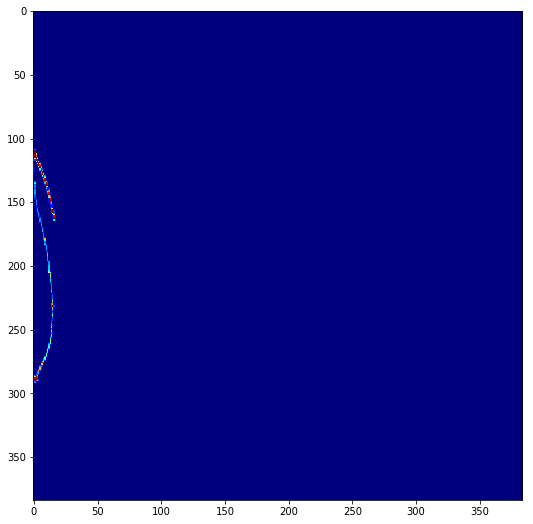

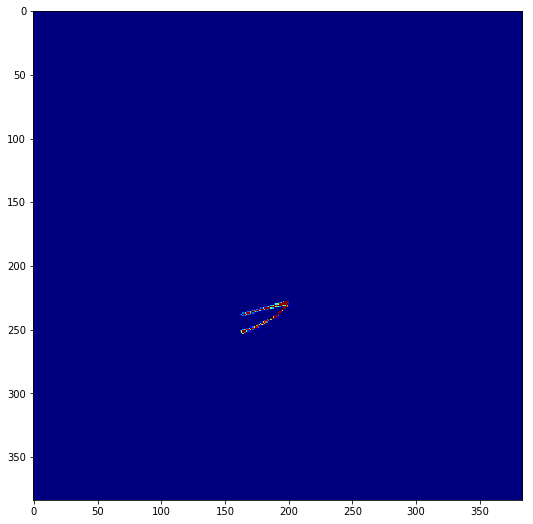

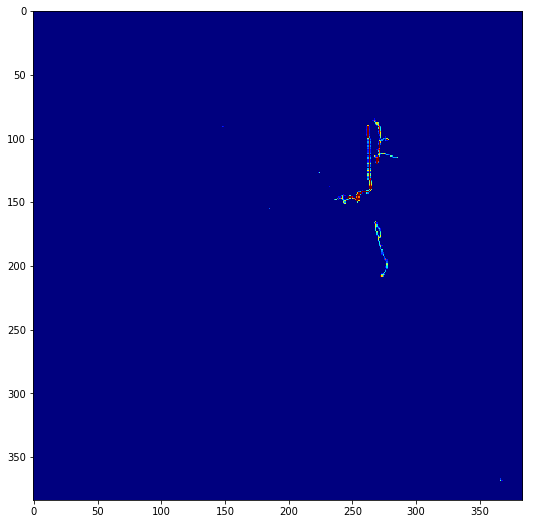

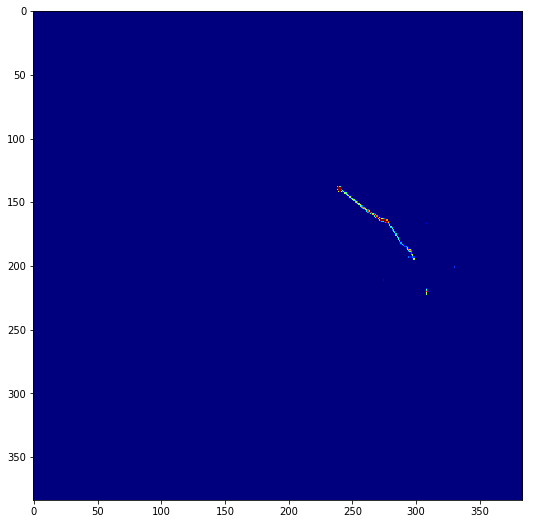

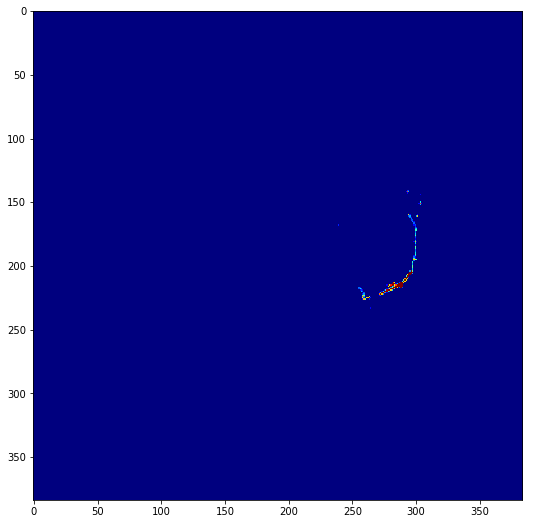

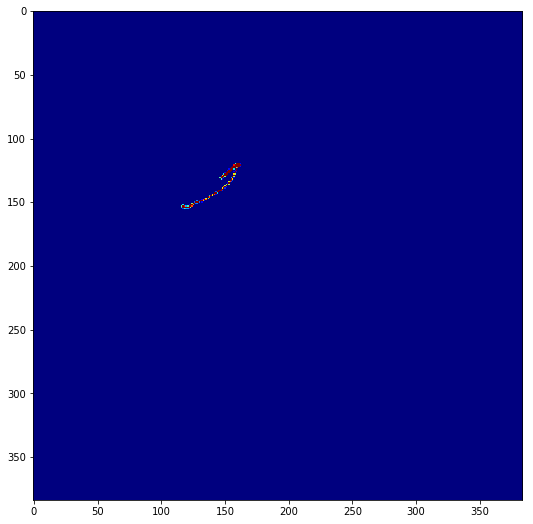

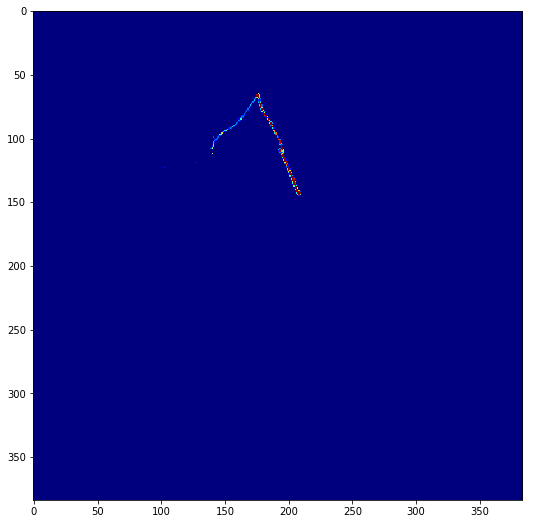

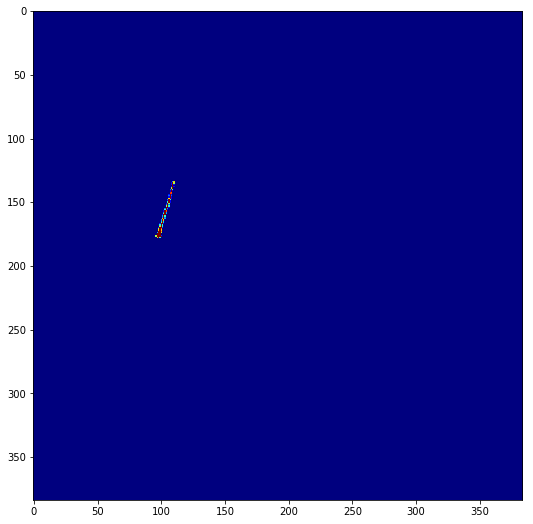

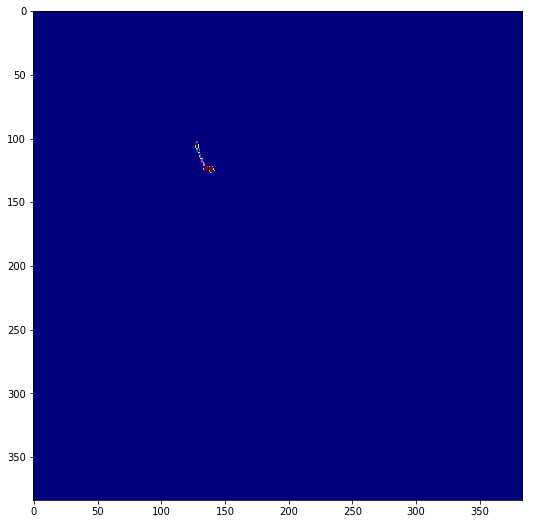

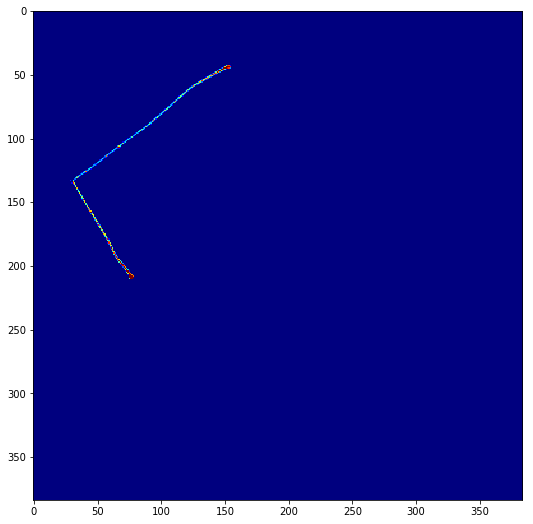

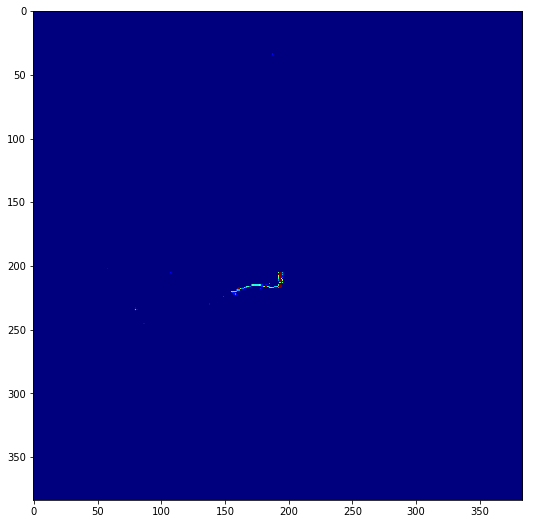

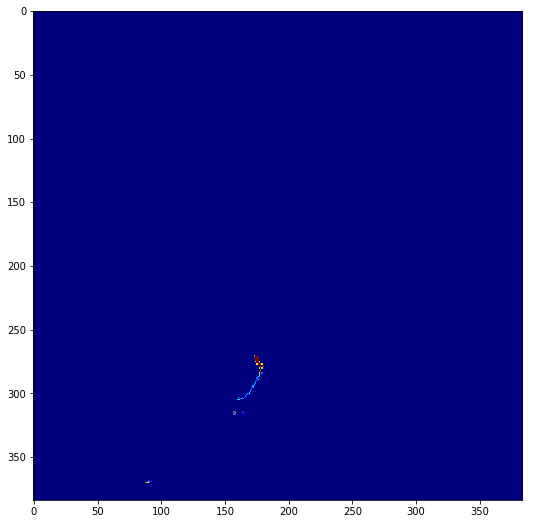

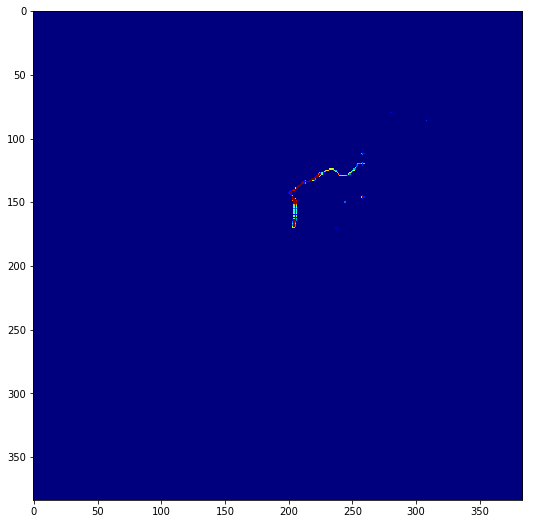

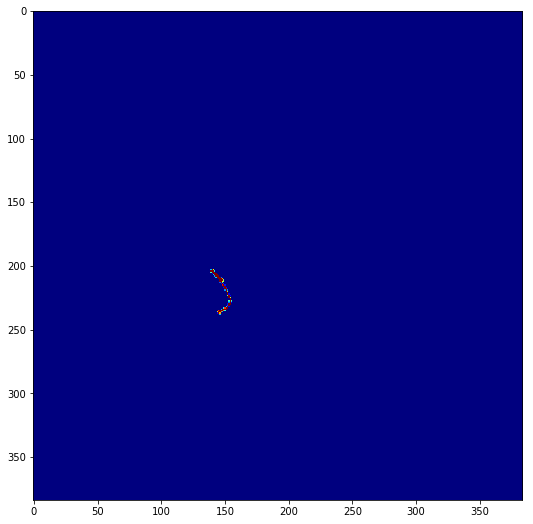

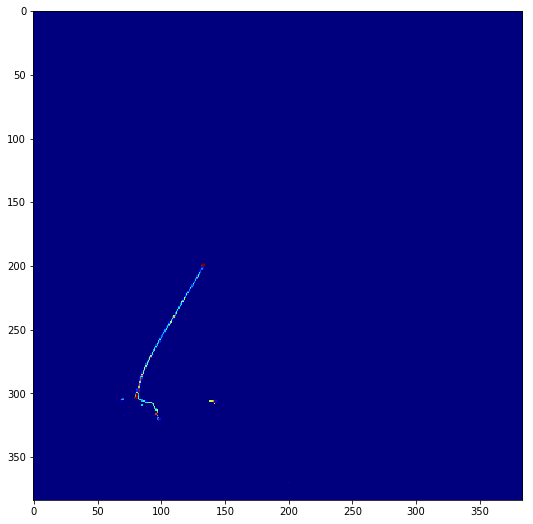

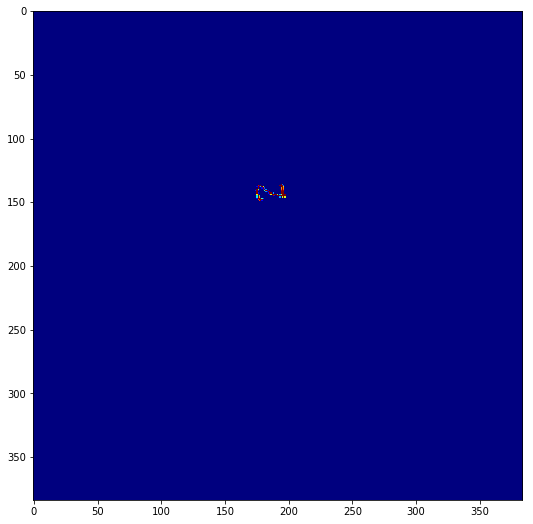

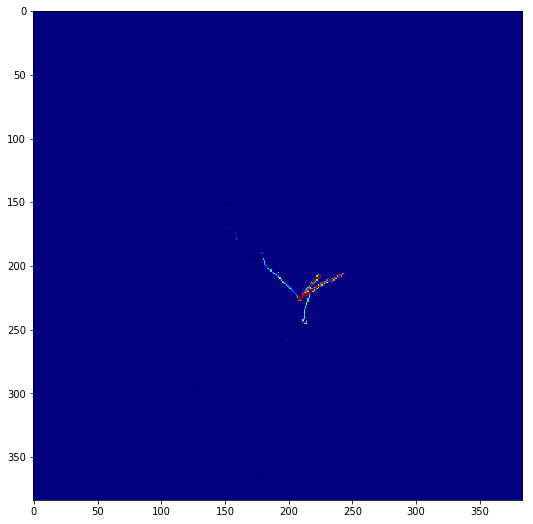

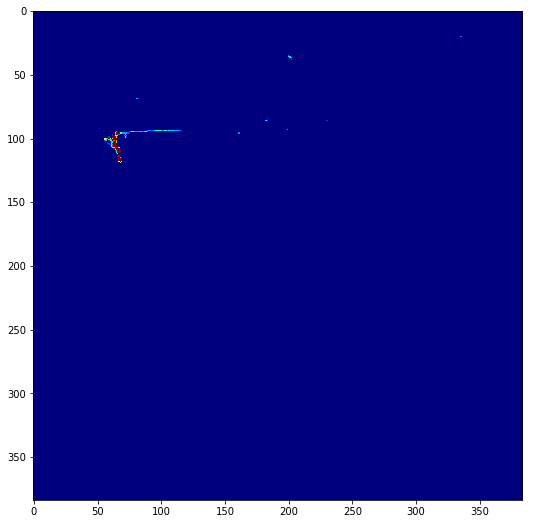

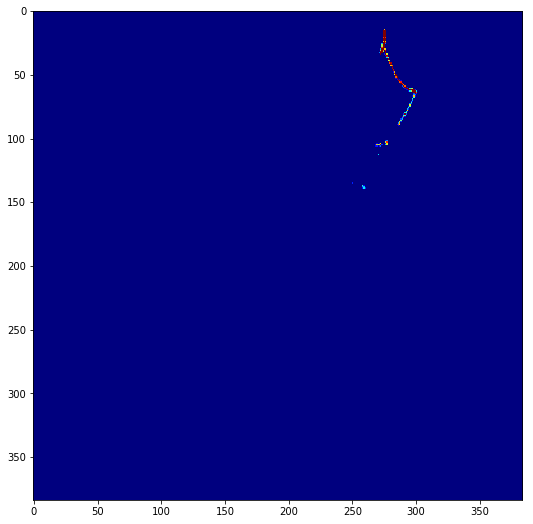

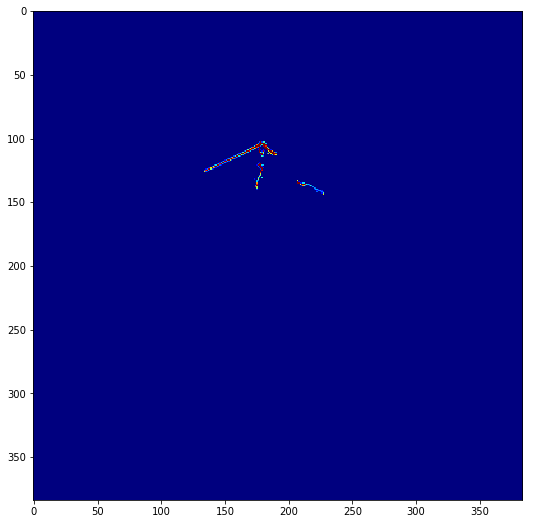

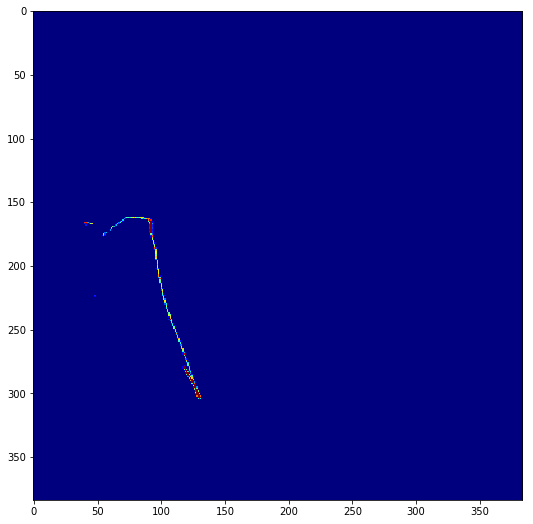

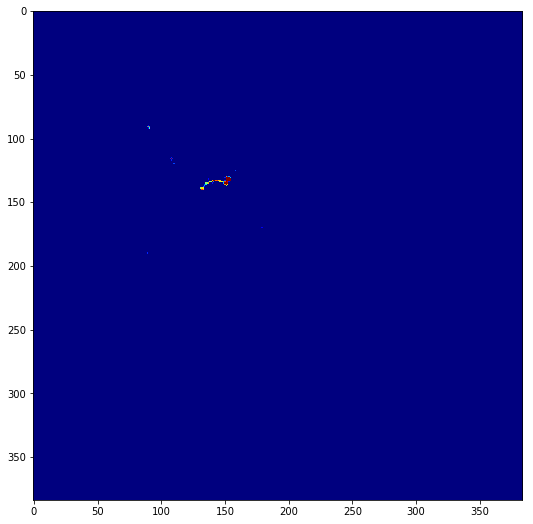

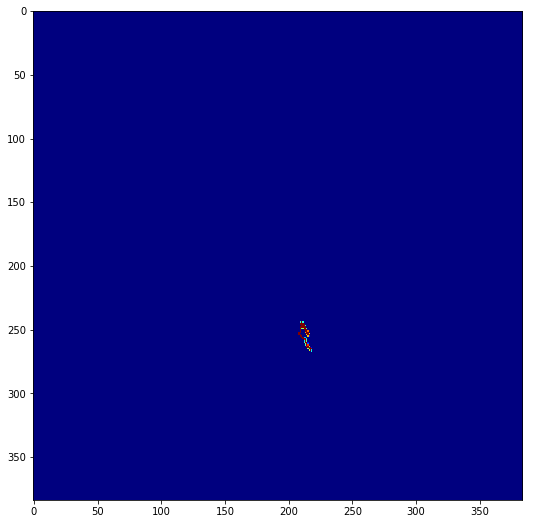

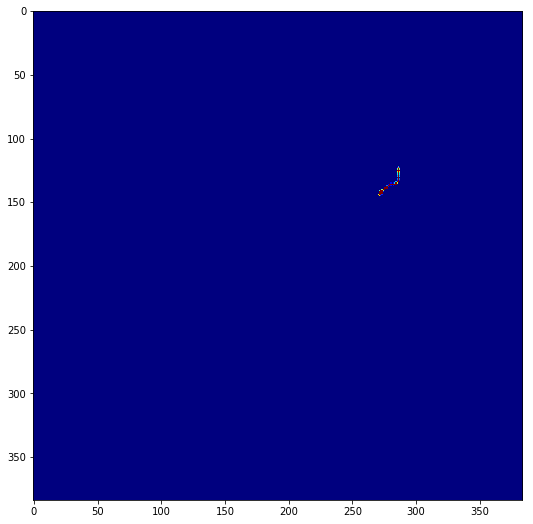

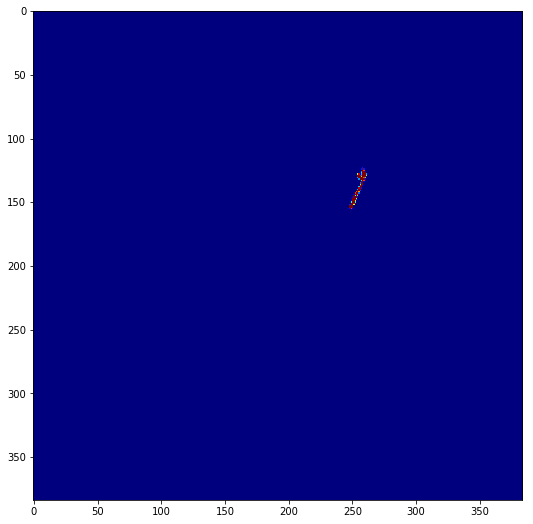

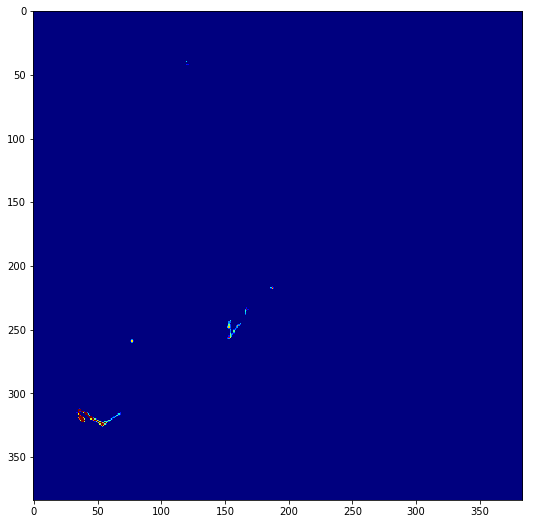

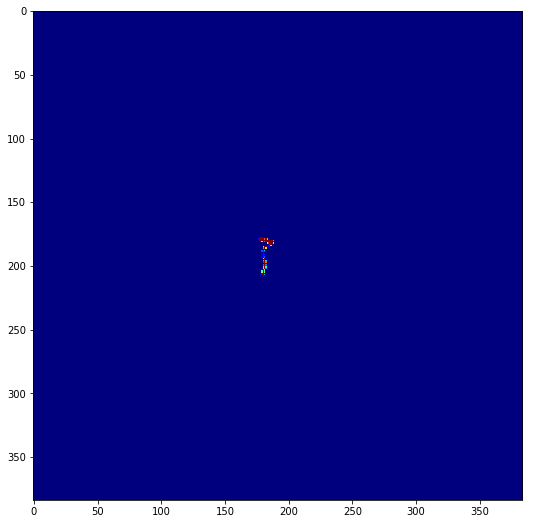

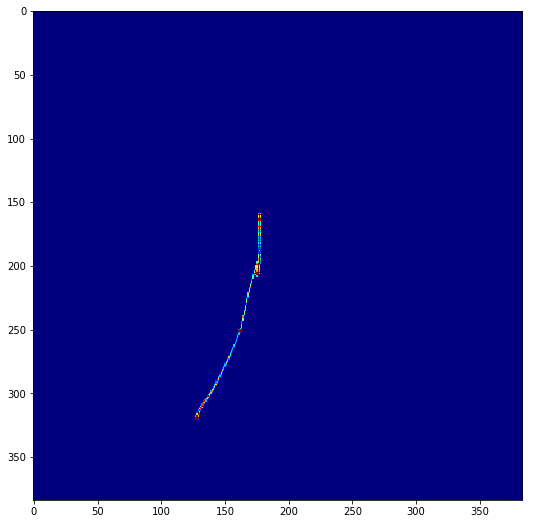

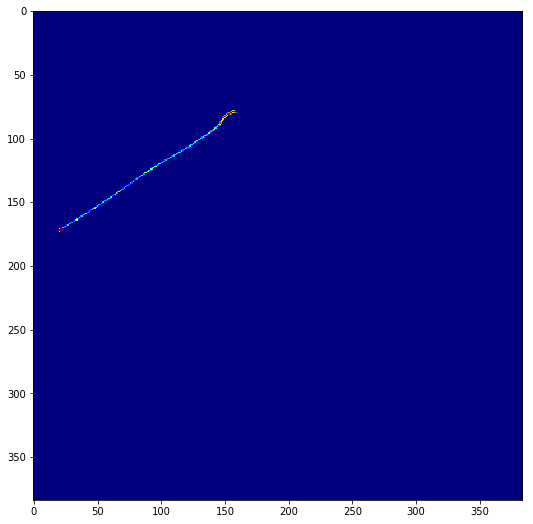

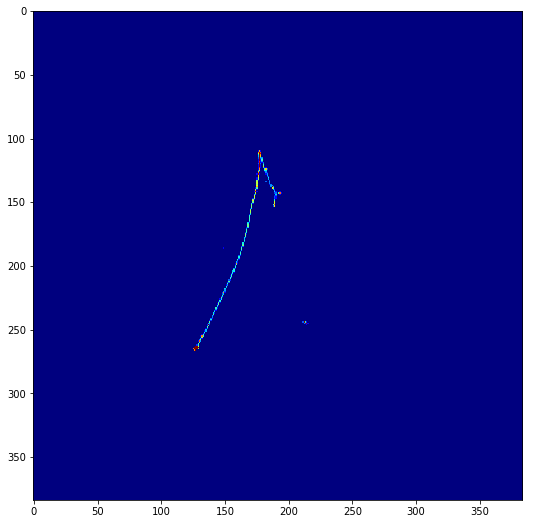

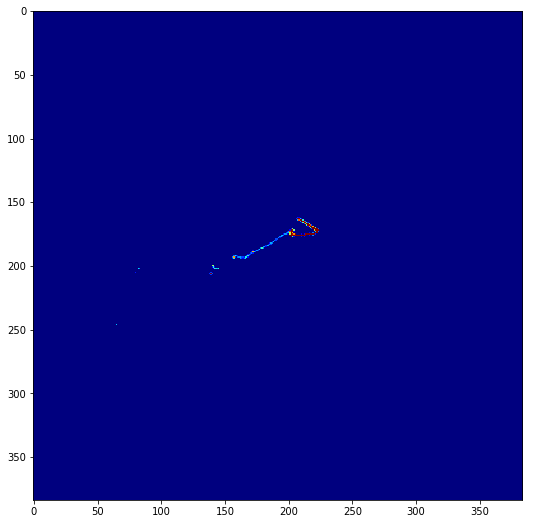

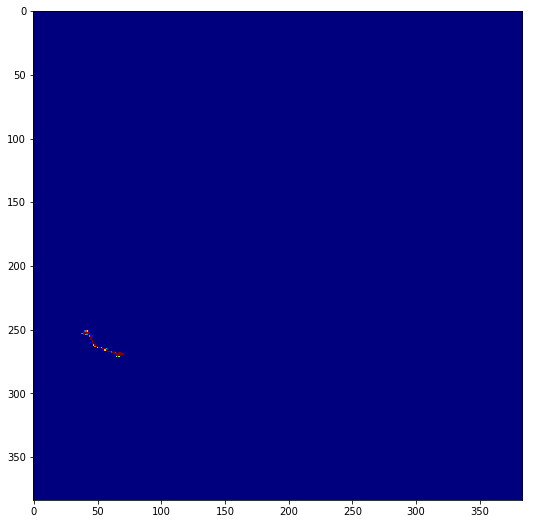

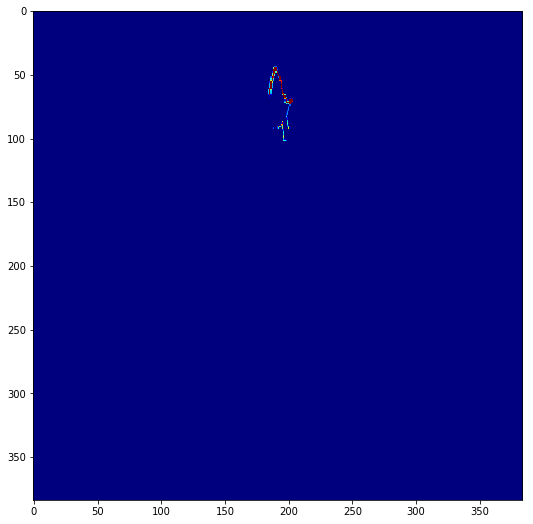

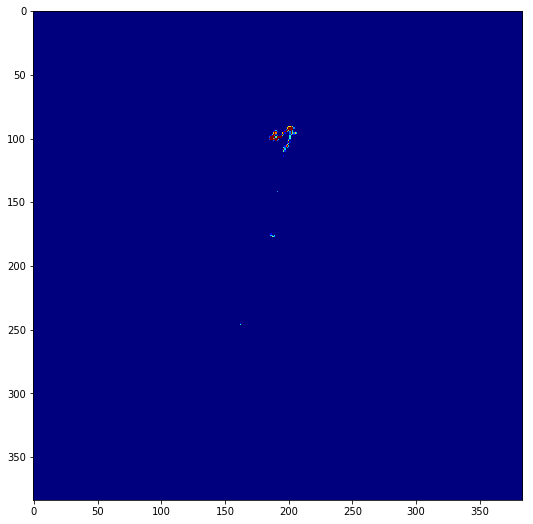

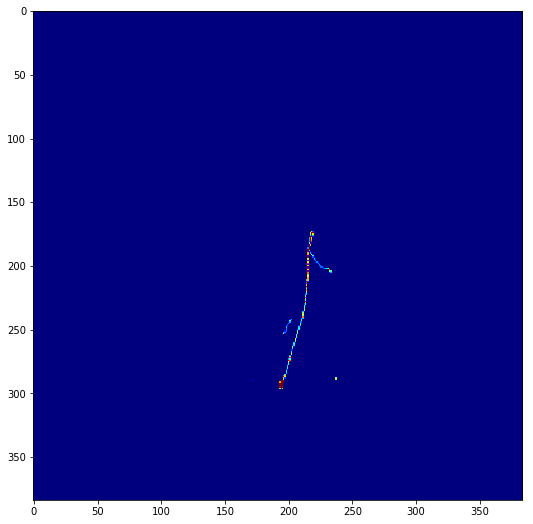

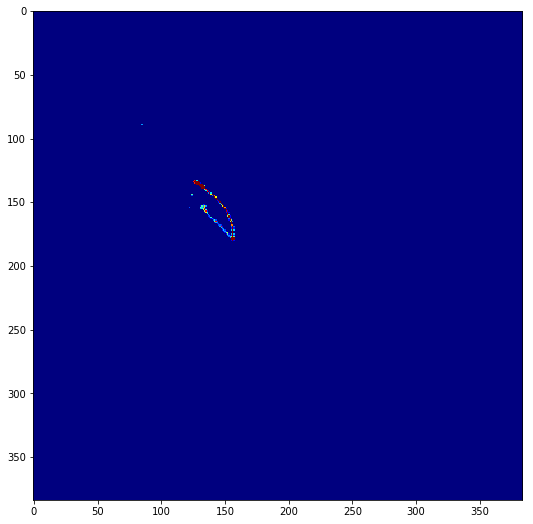

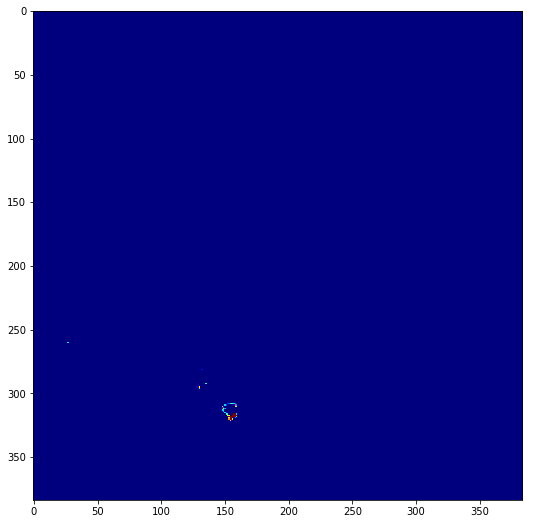

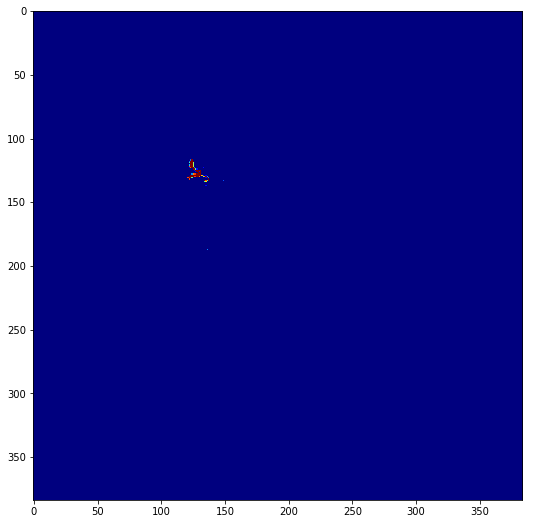

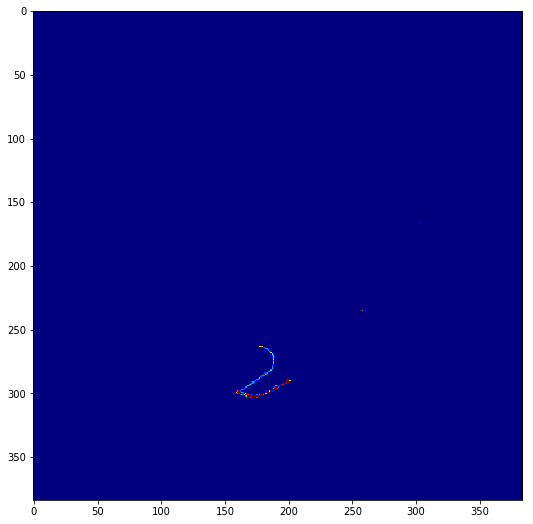

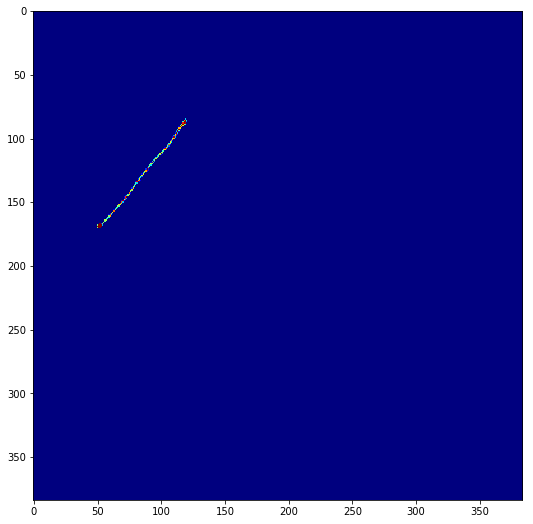

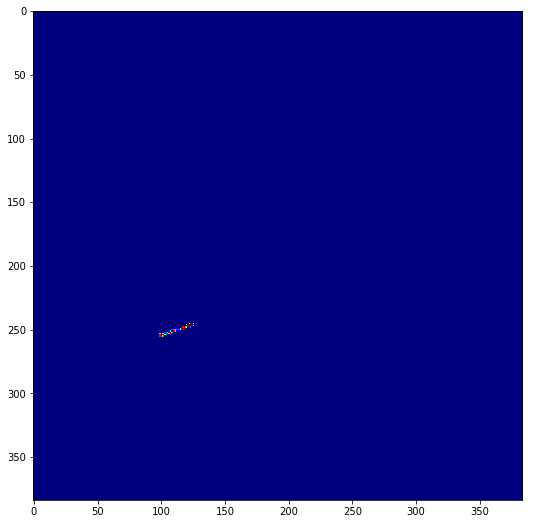

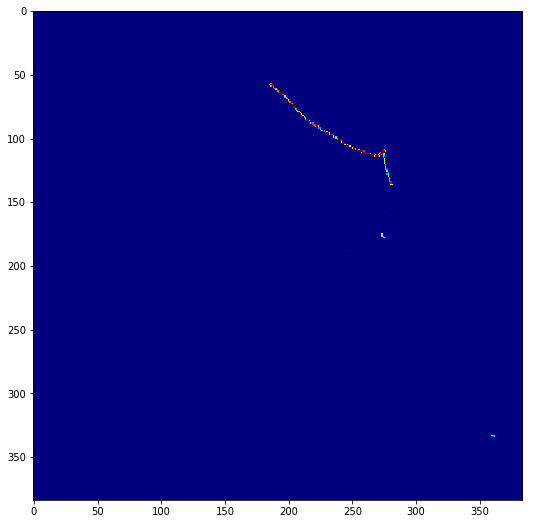

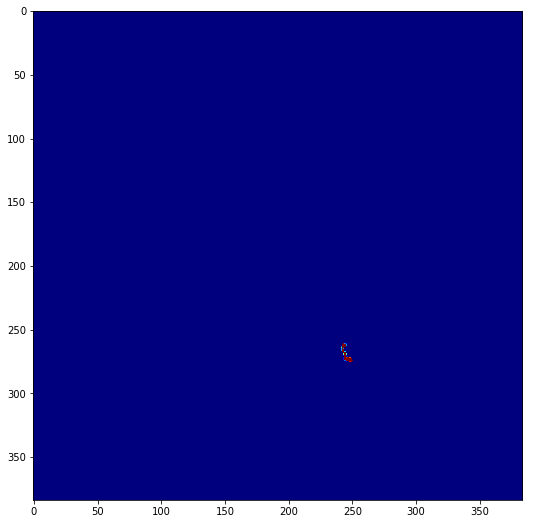

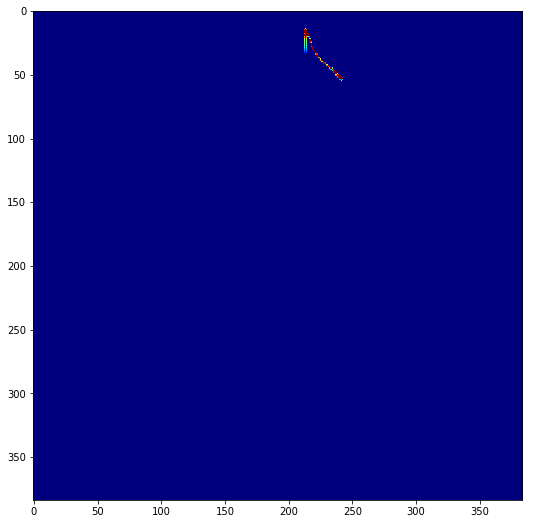

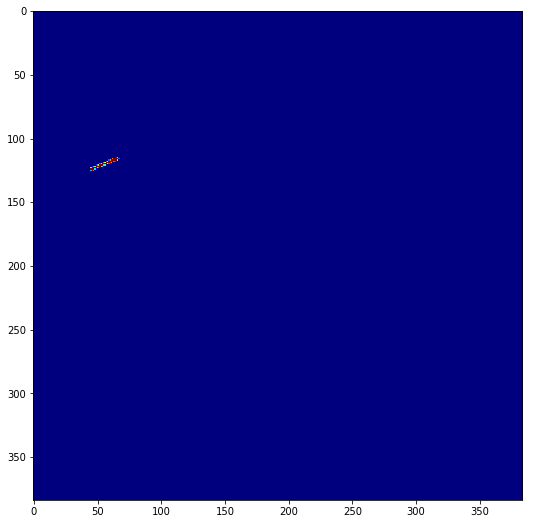

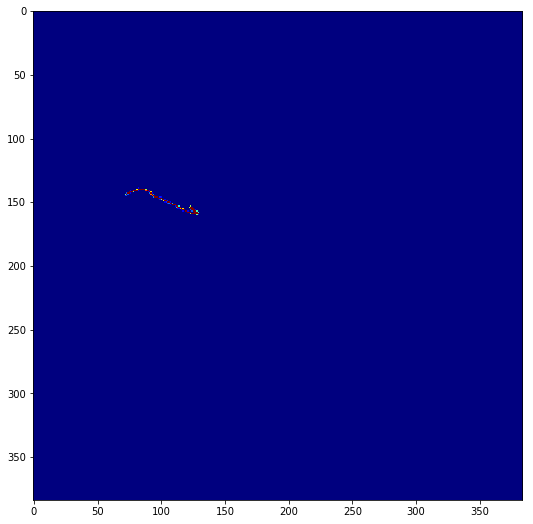

('Entry', 589, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 755, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 1313, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 1688, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 1991, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 2409, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 2436, 'Particle PDG code', 321)
('Image index', 0)
image_numpy has type <type 'numpy.ndarray'>
Image dimensions are (384, 384)
('Entry', 2552, 'Particle PDG code', 321)
(

In [17]:
import ROOT
from larcv import larcv

REPOSITORY_DIR='../../'
_files = [REPOSITORY_DIR + f for f in ['mix.root']]
image_chain = ROOT.TChain("image2d_data_tree")
particle_chain = ROOT.TChain("particle_mctruth_tree")

for _file in _files: image_chain.AddFile(_file)
for _file in _files: particle_chain.AddFile(_file)
entries = badly_classified['entry'].values

for entry in entries:
    image_chain.GetEntry(entry)
    particle_chain.GetEntry(entry)
    entry_data = particle_chain.particle_mctruth_branch
    for particle in entry_data.as_vector(): print('Entry',entry,'Particle PDG code',particle.pdg_code())
    image2d_array = image_chain.image2d_data_branch.as_vector()

    for index, image in enumerate(image2d_array[0:1]):
        image_numpy = larcv.as_ndarray(image)
        print("Image index", index)
        print("image_numpy has type {}".format(type(image_numpy)))
        print("Image dimensions are {}".format(image_numpy.shape))
        
        
        fig = plt.figure(figsize=(9,9))
        plt.imshow(image_numpy, interpolation='none',cmap='jet', vmin = 0, vmax = 100)
        plt.show()

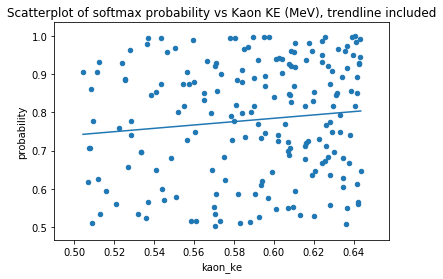

In [18]:
query2.plot.scatter(x='kaon_ke', y='probability')
x = query2['kaon_ke']

y = query2['probability']
plt.title('Scatterplot of softmax probability vs Kaon KE (MeV), trendline included')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

(array([11.,  4.,  9., 10.,  6., 10., 14., 14., 15., 15., 19., 18., 22.,
        24.]),
 array([ 10.814,  20.814,  30.814,  40.814,  50.814,  60.814,  70.814,
         80.814,  90.814, 100.814, 110.814, 120.814, 130.814, 140.814,
        150.814]),
 <a list of 14 Patch objects>)

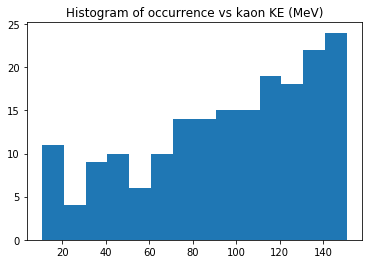

In [19]:
data = (query2['kaon_ke'] - 0.49368)*1000
binwidth = 10
plt.title('Histogram of occurrence vs kaon KE (MeV)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

(array([ 7.,  5.,  3.,  9.,  8.,  8., 12., 15., 20., 21., 30., 30., 23.]),
 array([0.21045089, 0.26045089, 0.31045089, 0.36045089, 0.41045089,
        0.46045089, 0.51045089, 0.56045089, 0.61045089, 0.66045089,
        0.71045089, 0.76045089, 0.81045089, 0.86045089]),
 <a list of 13 Patch objects>)

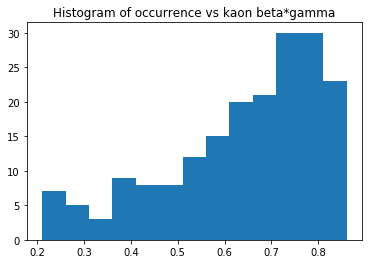

In [36]:
data = query2['kaon_ke']
data = ((data**2 - (0.49368)**2)**0.5)/(0.49368)
binwidth = 0.05
plt.title('Histogram of occurrence vs kaon beta*gamma')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

In [4]:
query3 = query1.query('kaon_ke == -1')
print('Number of proton + muon classified as kaon: ' + str(query3.index.size))
print(query3.to_string())

Number of proton + muon classified as kaon: 190
       entry  run  subrun  event  label  prediction  probability  kaon_ke  proton_ke   muon_ke
107      107    1      97   9675      1           0     0.548192     -1.0   1.062060  0.248323
161      161    1      53   5281      1           0     0.803972     -1.0   1.081390  0.240665
183      183    1      11   1095      1           0     0.864383     -1.0   1.014970  0.242904
530      530    1      35   3438      1           0     0.500000     -1.0   1.047800  0.320290
682      682    1      34   3318      1           0     0.500000     -1.0   1.124320  0.277369
1009    1009    1      77   7604      1           0     0.533513     -1.0   1.009740  0.267555
1119    1119    1      63   6273      1           0     0.676405     -1.0   1.033370  0.262506
1202    1202    1      62   6133      1           0     0.846596     -1.0   1.020560  0.236811
1204    1204    1      20   1977      1           0     0.863490     -1.0   0.989758  0.268423
13

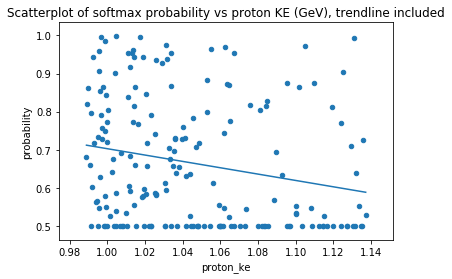

In [21]:
query3.plot.scatter(x='proton_ke', y='probability')
x = query3['proton_ke']
y = query3['probability']
plt.title('Scatterplot of softmax probability vs proton KE (GeV), trendline included')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

(array([28., 19., 20., 17., 19., 15.,  6., 16.,  4.,  9.,  6.,  8.,  6.,
         7., 10.]),
 array([ 50.674,  60.674,  70.674,  80.674,  90.674, 100.674, 110.674,
        120.674, 130.674, 140.674, 150.674, 160.674, 170.674, 180.674,
        190.674, 200.674]),
 <a list of 15 Patch objects>)

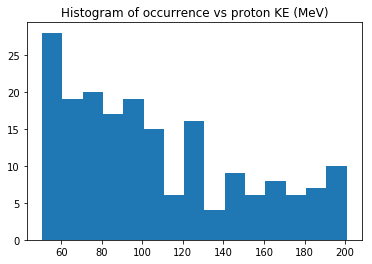

In [22]:
data = (query3['proton_ke'] - 0.93827)*1000
binwidth = 10
plt.title('Histogram of occurrence vs proton KE (MeV)')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

(array([41., 35., 31., 26., 19., 16., 21.,  1.]),
 array([0.33306556, 0.38306556, 0.43306556, 0.48306556, 0.53306556,
        0.58306556, 0.63306556, 0.68306556, 0.73306556]),
 <a list of 8 Patch objects>)

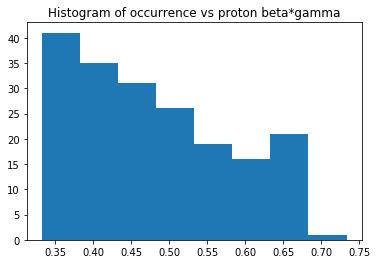

In [38]:
data = query3['proton_ke']
data = ((data**2 - (0.93827)**2)**0.5)/(0.93827)
binwidth = 0.05
plt.title('Histogram of occurrence vs proton beta*gamma')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

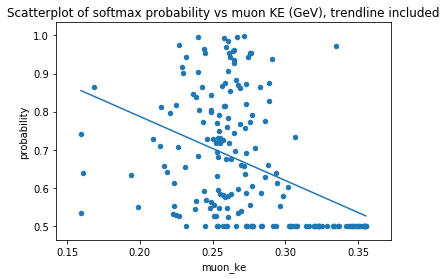

In [23]:
query3.plot.scatter(x='muon_ke', y='probability')
x = query3['muon_ke']
y = query3['probability']
plt.title('Scatterplot of softmax probability vs muon KE (GeV), trendline included')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

Mean: 153.66409722222224 MeV
Std: 20.76084024147902 MeV


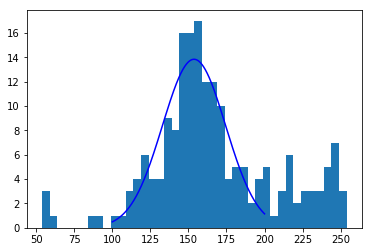

In [14]:
import numpy as np

data = (query3['muon_ke'] - 0.10566)*1000

# mean = np.mean(data)
# variance = np.var(data)
# sigma = np.sqrt(variance)
# print("Mean: " + str(mean))
# print("Std: " + str(sigma))
binwidth = 5
# plt.title('Normalized histogram of occurrence vs muon KE (MeV)')
# n, bins, patches = plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), normed=1)
# plt.plot(bins,mlab.normpdf(bins, mean, sigma))

def gaussian(r,mean,total,std):
    prob = (1.0/(std*np.sqrt(2*np.pi)))*np.exp(-.5*((r-mean)/std)**2)
    return total*prob*binwidth

# x = np.linspace(np.amin(data),np.amax(data),1000)
x = np.linspace(100, 200, 1000)
modified_data = [i for i in data if (i >= 100 and i <= 200)]
mean = np.mean(modified_data)
total = len(modified_data)
std = np.sqrt(np.var(modified_data))

plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.plot(x,gaussian(x,mean,total, std), color='blue')

print("Mean: " + str(mean) + " MeV")
print("Std: " + str(std) + " MeV")

(array([ 3.,  1.,  0.,  0.,  2.,  1.,  4., 11.,  7., 15., 28., 32., 24.,
         7.,  9.,  9.,  3.,  9.,  7.,  6., 12.]),
 array([1.13126852, 1.23126852, 1.33126852, 1.43126852, 1.53126852,
        1.63126852, 1.73126852, 1.83126852, 1.93126852, 2.03126852,
        2.13126852, 2.23126852, 2.33126852, 2.43126852, 2.53126852,
        2.63126852, 2.73126852, 2.83126852, 2.93126852, 3.03126852,
        3.13126852, 3.23126852]),
 <a list of 21 Patch objects>)

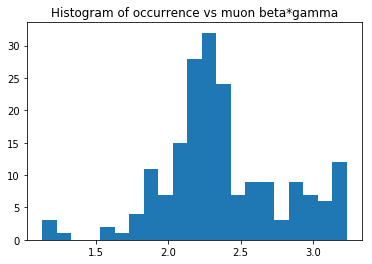

In [40]:
data = query3['muon_ke']
data = ((data**2 - (0.10566)**2)**0.5)/(0.10566)
binwidth = 0.1
plt.title('Histogram of occurrence vs muon beta*gamma')
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))